# OH/IR stars statistical analysis with THOR/SPLASH data

1. Data Processing <br>
  1.1 SPLASH <br>
  1.2 THOR   <br>
  1.3 Figures (Fig1, Fig7, Fig8) <br>
  
2. Scale height estimation <br>
  2.1 Model (K-S test) <br>
  2.2 Model (Kinematic distance) <br>
  2.3 Figures (Fig2, Fig3, Fig4, Fig5, Fig6) <br>

3. Lifetime estimation <br>
  3.1 Cross Matching <br>
      3.1.1. SPLASH <br>
      3.1.2. THOR  <br>
  3.2 Lifetime probability distribution <br>
  3.3 Figures (Fig9, Fig10) -flux variabiliey- <br>

## 1. Data Processing
### 1. 1 SPLASH (ATCA follow-up)
Name, R.A.(J2000), Decl.(J2000), Flux density; peak, integrated, Velocity; peak, min, max, Relative uncertainty; minor axis (arcsec), major axis (arcsec), position angle (deg), Comments, Ref.

In [1]:
# Coherency check with Qiao et al. 
qiao_2019 = [{'name':'pilot ', 'repo':119, 'path':'data/spla/Pilot_1612.txt'},
             {'name':'gc    ', 'repo':268, 'path':'data/spla/GalacticCenter_1612.txt'},
             {'name':'remain', 'repo':235, 'path':'data/spla/Remain_1612.txt'}] # number of reported maser spots in the paper
print(' ** Coherency check ** ')
print('Repo'.rjust(10),'Real')
csum = 0
for d in qiao_2019:
    count = 0
    with open(d['path']) as f:
        lines = f.readlines()
        for t in lines:
            t_split = t.split()
            spot_id = t_split[0][-1]
            mtype   = t_split[11][:2]
            if spot_id == 'A':
                if mtype == 'ES' or mtype == 'PN':
                    count +=1
    print(d['name'], d['repo'], count)
    csum +=count

print('total ', 119 + 268 + 235, csum)
print('  -- MEMO --  ')
print('There are differences izn GC and remain region slightly.')
print('This is likely because Qiao et al. supplemented data from MAGMO data set.')

 ** Coherency check ** 
      Repo Real
pilot  119 111
gc     268 268
remain 235 233
total  622 612
  -- MEMO --  
There are differences izn GC and remain region slightly.
This is likely because Qiao et al. supplemented data from MAGMO data set.


total maser spots: 1668
total maser sites:  752


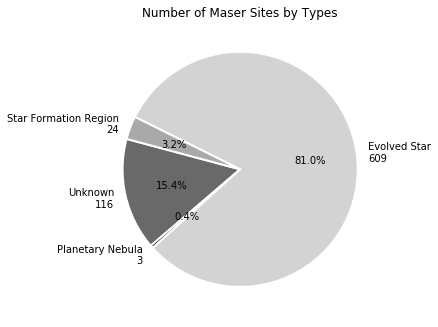

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
path = 'data/spla_1612.txt'
with open(path) as f:
    data = f.readlines()
na  = np.array([x.split()[0][:-6] for x in data])      # name
lo  = np.array([float(x[1:8])-360 if float(x[1:8])>180 else float(x[1:8]) for x in na])           # longitude
la  = np.array([float(x[8:14]) for x in na])           # latitude
ra  = np.array([x.split()[1] for x in data])           # R.A
de  = np.array([x.split()[2] for x in data])           # Decl.
fl  = np.array([ float(x.split()[3]) for x in data])   # flux peak
vp  = np.array([ float(x.split()[5]) for x in data])   # velocity peak
vmi = np.array([ float(x.split()[6]) for x in data])   # velocity min
vma = np.array([ float(x.split()[7]) for x in data])   # velocity max
pux = np.array([ float(x.split()[8]) for x in data])   # relative positional uncertainty x
puy = np.array([ float(x.split()[9]) for x in data])   # relative positional uncertainty y
co  = np.array([x.split()[11] for x in data])          # comments
re  = np.array([x.split()[12] for x in data])# Ref.
print('total maser spots:', len(data))

i_un, i_pn, i_es, i_sf = [], [], [], []
for i, c in enumerate(co):
    if data[i].split()[0][-1] == 'A':
        if c[0] == 'U':
            i_un.append(i)
        if c[0] == 'P':
            i_pn.append(i)
        if c[0] == 'E':
            i_es.append(i)
        if c[0] == 'S':
            i_sf.append(i)

fig = plt.figure(figsize=(6,6))
wprops = {'edgecolor':'white', 'linewidth': 2}
colors = ['dimgray','black','lightgray','darkgray']
labels = 'Unknown\n'+ str(len(i_un)), \
          'Planetary Nebula\n' + str(len(i_pn)), \
          'Evolved Star\n' + str(len(i_es)), \
          'Star Formation Region\n' + str(len(i_sf))
total = len(i_un) + len(i_pn) + len(i_es) + len(i_sf)
ratio = [len(i_un)/total, len(i_pn)/total, len(i_es)/total, len(i_sf)/total]
ax  = fig.add_subplot(111)
ax.pie( ratio, labels=labels,colors=colors, 
        startangle=165,wedgeprops=wprops,
        autopct='%1.1f%%')

ax.set_title('Number of Maser Sites by Types')
plt.tight_layout()
print('total maser sites: ', total)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


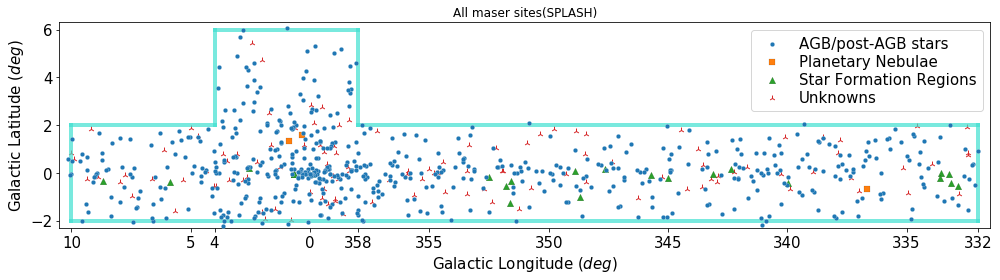

In [3]:
##############################
# Let's draw SPLASH region ! #
##############################
linecolor = 'turquoise'
linewidth = 4
alpha     = 0.7  # transparancy
lines_spla= [{'l':[28,28],'b':[-2,2]}, {'l':[28,2], 'b':[2,2]},
             {'l':[2,2], 'b':[2,6]}, {'l':[2,-4], 'b':[6,6]},
             {'l':[-4,-4], 'b':[6,2]}, {'l':[-4,-10], 'b':[2,2]},
             {'l':[-10,-10], 'b':[2,-2]}, {'l':[-10, 28], 'b':[-2,-2]},
            ]
lines_stat = [{'l':[28,28],'b':[-2,2]}, {'l':[28,-10],'b':[2,2]},
             {'l':[-10,-10], 'b':[2,-2]}, {'l':[-10, 28], 'b':[-2,-2]},
            ]

lines_stat_ = [{'l':[28,28],'b':[-1.25,1.25]}, {'l':[28,-10],'b':[1.25,1.25]},
             {'l':[-10,-10], 'b':[1.25,-1.25]}, {'l':[-10, 28], 'b':[-1.25,-1.25]},
            ]

def splash(ax):
    for i, coord in enumerate(lines_spla):
        ax.plot(np.array(coord['l']),np.array(coord['b']), linewidth=linewidth,color=linecolor, alpha=alpha)

def splash_stat(ax):
    for i, coord in enumerate(lines_stat):
        ax.plot(np.array(coord['l']),np.array(coord['b']), linewidth=linewidth, color=linecolor, alpha=alpha)

        
def splash_stat_(ax):
    for i, coord in enumerate(lines_stat_):
        ax.plot(np.array(coord['l']),np.array(coord['b']), linewidth=linewidth, color=linecolor, alpha=alpha)


figsize = (14,4)
fig = plt.figure(figsize=figsize)
ax  = fig.add_subplot(111)
ax.set_title('All maser sites(SPLASH)')
splash(ax)


ax.scatter(-lo[i_es], la[i_es],marker='o',alpha=1,s=20,edgecolors='white',linewidth=0.2, label='AGB/post-AGB stars',zorder=4)
ax.scatter(-lo[i_pn], la[i_pn],marker='s',alpha=1,s=45,edgecolors='black',linewidth=0.1, label='Planetary Nebulae',zorder=3)
ax.scatter(-lo[i_sf], la[i_sf],marker='^',alpha=1,s=45,edgecolors='black',linewidth=0.1, label='Star Formation Regions', zorder=2)
ax.scatter(-lo[i_un], la[i_un],marker='2',alpha=1,s=35,edgecolors='black',linewidth=1, label='Unknowns',zorder=1)

leg = plt.legend(loc='best', labelspacing=0.2, fontsize=15)
plt.xticks([ -10,-5, -4,0, 2, 5,10,15, 20, 25,28, 30], ["10","5", "4", "0", "358", "355", "350","345", "340","335", "332"])

plt.xlabel('Galactic Longitude ($deg$)', fontsize=15)
plt.ylabel('Galactic Latitude ($deg$)', fontsize=15)
plt.tick_params(labelsize=15)
plt.tight_layout()
plt.axes().set_aspect('equal', 'datalim')
plt.xlim(-10.5,28.5)
plt.ylim(-2.1,6.1)
plt.grid(False)

plt.show()

### OH/IR stars in SPLASH

In [5]:
# this program takes ~ 30 min
from astropy import units as u
from astropy.coordinates import SkyCoord
from tqdm import tqdm_notebook as tqdm


i_ohir = []
i_sf2  = [] # star formation region more thant 2 peaks
i_un2  = [] # unknown  more thant 2 peaks
i_pn2  = [] # planetary neblurae more thant 2 peaks
vra, vex, unc, ful, siz, num, pma, pmi = [], [], [], [], [], [], [], [] # pmax/pmix is the maximum/minimum positional uncertanity
lim_sep   = 8 #  8 arcsec ~ 0.002 deg; minimum separation to each source
skycoords = [SkyCoord(ra[i], de[i], unit=(u.hourangle, u.deg)) for i in range(len(data))]


#for i in tqdm(range(len(data))):
#    if data[i].split()[0][-1] == 'A' and co[i][:2] == 'ES':
#        c1  = skycoords[i]
#        sep = np.array([c1.separation(c2).arcsec for c2 in skycoords])
#        i_box = np.where(sep < lim_sep)[0] 
#        if len(i_box) > 1:
#            i_ohir.append(i)
#            vra.append(round((vp[i_box].min()+vp[i_box].max())/2, 2))
#            vex.append(round((vp[i_box].max()-vp[i_box].min())/2, 2))
#            unc.append(round(((vma[i_box].min() + vma[i_box].max())-(vmi[i_box].min()+vmi[i_box].max()))/2, 2))
#            ful.append(fl[i_box].max())
#            siz.append(round(sep[i_box].max(), 2))
#            num.append(len(i_box))
#            pmi.append(round(min(np.hstack([pux[i_box],puy[i_box]])),2))
#            pma.append(round(max(np.hstack([pux[i_box],puy[i_box]])),2))
#    if data[i].split()[0][-1] == 'A' and not co[i][:2] == 'ES':  ##
#            if co[i][:2] == 'SF': ##
#                i_sf2.append(i) ##
#            if co[i][:2] == 'UN': ##
#                i_un2.append(i) ##
#            if co[i][:2] == 'PN': ##
#                i_pn2.append(i) ##

#print('sf2:',len(i_sf2),'un2:',len(i_un2),'pn2:',len(i_pn2))##
#spla_ohir = np.vstack([na[i_ohir], lo[i_ohir], la[i_ohir], vra, vex, unc, ful, siz, num, pmi, pma, i_ohir])




#np.save('./data/spla_ohir.npy', spla_ohir)


# checking location of G355.715+0.991 of which size derived to be 0
#from astropy import units as u
#from astropy.coordinates import SkyCoord

#for i in range(len(data)):
##    if data[i].split()[0][-1] == 'A' and co[i][:2] == 'ES': 
#    if data[i].split()[0][:-6] == 'G335.715+0.991':  ##
#        print(data[i])
#        c1  = skycoords[i]
#        sep = np.array([c1.separation(c2).arcsec for c2 in skycoords])
#        i_box = np.where(sep < lim_sep)[0]
#        if len(i_box) > 1:
#            print(round(sep[i_box].max(), 5))




Number of OH/IR stars in SPLASH:  573
Uncertainty mean  :  3.38
Uncertainty median:  2.75


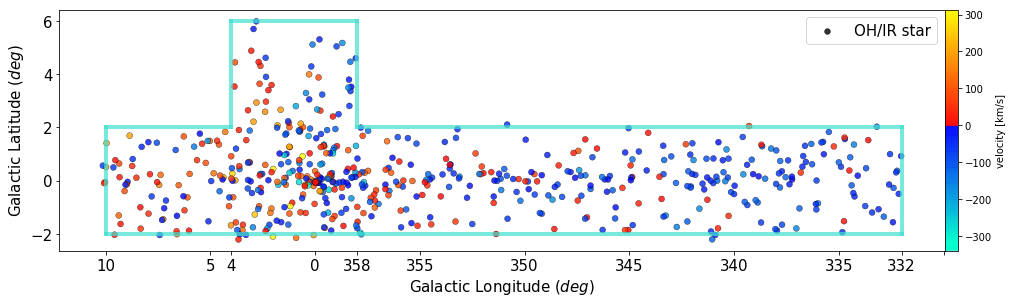

In [6]:
# Original Color Map
spla_ohir = np.load('./data/spla_ohir.npy')
na_sp = spla_ohir[0]
lo_sp = np.array([float(x)-360 if float(x)>180 else float(x) for x in spla_ohir[1]])
la_sp = np.array([float(x) for x in spla_ohir[2]])
vra   = np.array([float(x) for x in spla_ohir[3]])
vex   = np.array([float(x) for x in spla_ohir[4]])
unc   = np.array([float(x) for x in spla_ohir[5]])
ful   = np.array([float(x) for x in spla_ohir[6]])
siz   = np.array([float(x) for x in spla_ohir[7]])
num   = np.array([float(x) for x in spla_ohir[8]])
pmi   = np.array([float(x) for x in spla_ohir[9]])
pma   = np.array([float(x) for x in spla_ohir[10]])
i_ohir = np.array([float(x) for x in spla_ohir[11]])


import matplotlib.colors as clr
velc = {'blue':((0.0,0,0.8),(0.5,1, 0),(1.0, 0,0.0)),
        'green':((0,1,1),(0.5,0,0),(1,1,1)),
        'red':((0.0,0,0),(0.5,0,1),(1.0,1,0))}
velc = clr.LinearSegmentedColormap('velc', velc)

fig         = plt.figure(figsize=(14,4))
xticks      = [ -10,-5, -4,0, 2, 5,10,15, 20, 25,28, 30]
xticklabels = ["10","5", "4", "0", "358", "355", "350","345", "340","335", "332"]
ax = fig.add_subplot(111, xticks=xticks, xticklabels=xticklabels)
mapable = ax.scatter(-lo_sp, la_sp, c=vra, alpha = 0.8, s=35, cmap=velc, label='OH/IR star', edgecolors='black', linewidth=0.4)
pp = fig.colorbar(mapable, orientation='vertical',pad=0.001,fraction=0.07, label = 'velocity [km/s]')
pp.set_clim(-320,320)
leg = ax.legend(loc='best', labelspacing=0.2, fontsize=15)
lh = leg.legendHandles 
lh[0].set_color('black')
splash(ax)
plt.tick_params(labelsize=15)
plt.tight_layout()
plt.xlabel('Galactic Longitude ($deg$)', fontsize=15)
plt.ylabel('Galactic Latitude ($deg$)', fontsize=15)
print('Number of OH/IR stars in SPLASH: ', len(na_sp))
print('Uncertainty mean  : ', round(np.array(unc).mean(),2))
print('Uncertainty median: ', np.median(np.array(unc)))

plt.show()

### OH/IR in the statistics field

Number of OH/IR stars in SPLASH:  508


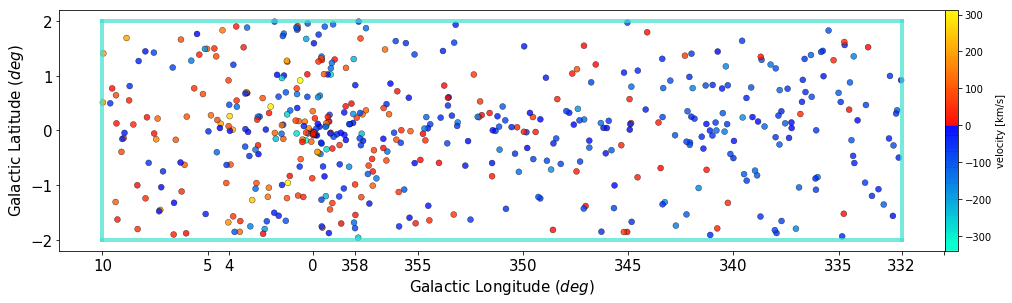

In [7]:
i_stat = []
i_gc   = []
i_gc_  = []
gc     = 4
for i in range(len(na_sp)):
    if -2 < la_sp[i] < 2 and -28 < lo_sp[i] <10:
        i_stat.append(i)
        if -gc < lo_sp[i] < gc:
            i_gc.append(i)
        else:
            i_gc_.append(i)
stat_spla = np.vstack([na_sp[i_stat], lo_sp[i_stat], la_sp[i_stat],
                     vra[i_stat], vex[i_stat], unc[i_stat],
                      ful[i_stat], siz[i_stat],num[i_stat], pmi[i_stat], pma[i_stat], i_ohir[i_stat]])

fig         = plt.figure(figsize=(14,4))
xticks      = [ -10,-5, -4,0, 2, 5,10,15, 20, 25,28, 30]
xticklabels = ["10","5", "4", "0", "358", "355", "350","345", "340","335", "332"]
ax = fig.add_subplot(111, xticks=xticks, xticklabels=xticklabels)
mapable = ax.scatter(-lo_sp[i_stat], la_sp[i_stat], c=vra[i_stat], alpha = 0.8, s=35, cmap=velc, edgecolors='black', linewidth=0.4)
pp = fig.colorbar(mapable, orientation='vertical',pad=0.001,fraction=0.07, label = 'velocity [km/s]')
pp.set_clim(-320,320)
plt.tick_params(labelsize=15)
plt.tight_layout()
plt.xlabel('Galactic Longitude ($deg$)', fontsize=15)
plt.ylabel('Galactic Latitude ($deg$)', fontsize=15)
splash_stat(ax)
print('Number of OH/IR stars in SPLASH: ', len(i_stat))
plt.show()

## 1.2 THOR

total maser sites:  621


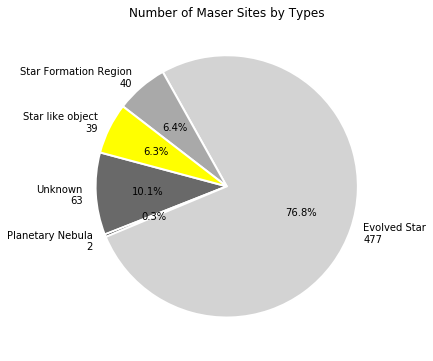

In [8]:
# 0: name, 1: ra, 2: dec, 3: peakfluxdensity, 4: rms, 5: integratedfluxdensity,
# 6: peakvelocity, 7: vmin, 8: vmax, 9: deltax, 10: deltay, 11:comments
path = './data/thor_1612.txt'
with open(path) as f:
    thor_1612 = f.readlines()
    
i_source = []
i_un, i_pn, i_es, i_sf, i_st = [], [], [], [], []
for i in range(len(thor_1612)):
    if thor_1612[i].split()[0][-1] == 'A':
        i_source.append(i)
        c = thor_1612[i].split()[-1]
        if c[0] == 'U':
            i_un.append(i)
        if c[0] == 'P':
            i_pn.append(i)
        if c[0] == 'E':
            i_es.append(i)
        if c[:2] == 'SF':
            i_sf.append(i)
        if c[:2] == 'St':
            i_st.append(i)       

fig = plt.figure(figsize=(6,6))
wprops = {'edgecolor':'white', 'linewidth': 2}
colors = ['dimgray','black','lightgray','darkgray','yellow']
labels = 'Unknown\n'+ str(len(i_un)), \
          'Planetary Nebula\n' + str(len(i_pn)), \
          'Evolved Star\n' + str(len(i_es)), \
          'Star Formation Region\n' + str(len(i_sf)), \
           'Star like object\n' + str(len(i_st)) 
total = len(i_un) + len(i_pn) + len(i_es) + len(i_sf)+ len(i_st)
ratio = [len(i_un)/total, len(i_pn)/total, len(i_es)/total, len(i_sf)/total, len(i_st)/total]
ax  = fig.add_subplot(111)
ax.pie( ratio, labels=labels,colors=colors, 
        startangle=165,wedgeprops=wprops,
        autopct='%1.1f%%')

ax.set_title('Number of Maser Sites by Types')
plt.tight_layout()
print('total maser sites: ', total)
plt.show()

In [20]:
from astropy import units as u
from astropy.coordinates import SkyCoord as sc
unit = (u.hourangle,u.deg)


num_th = np.hstack([i_source[1:],len(thor_1612)]) - np.array(i_source)
typ_th = np.array([thor_1612[i].split()[-1] for i in i_source])
nam_th = np.array([thor_1612[i].split()[0][:-6] for i in i_source])
lon_th = np.array([float(l[1:7]) for l in nam_th])
lat_th = np.array([float(b[7:13]) for b in nam_th])
ra_1612  = np.array([thor_1612[i][20:32] for i in range(len(thor_1612))])
dec_1612 = np.array([thor_1612[i][33:45] for i in range(len(thor_1612))])
skycd_1612 = np.array([sc(ra_1612[i],dec_1612[i],unit=unit) for i in range(len(ra_1612))])
pkflu_1612 = np.array([float(thor_1612[i].split()[7]) for i in range(len(thor_1612))])
pkvel_1612 = np.array([float(thor_1612[i].split()[10]) for i in range(len(thor_1612))])
vmin_1612  = np.array([float(thor_1612[i].split()[11]) for i in range(len(thor_1612))])
vmax_1612  = np.array([float(thor_1612[i].split()[12]) for i in range(len(thor_1612))])
pux_1612   = np.array([float(thor_1612[i].split()[13]) for i in range(len(thor_1612))])
puy_1612   = np.array([float(thor_1612[i].split()[14]) for i in range(len(thor_1612))])
rad_th = np.array([(np.max(pkvel_1612[i_source[i]:i_source[i]+num_th[i]])+np.min(pkvel_1612[i_source[i]:i_source[i]+num_th[i]]))/2 for i in range(len(i_source))])
exp_th = np.array([(np.max(pkvel_1612[i_source[i]:i_source[i]+num_th[i]])-np.min(pkvel_1612[i_source[i]:i_source[i]+num_th[i]]))/2 for i in range(len(i_source))])
unc_th = np.array([((np.max(vmax_1612[i_source[i]:i_source[i]+num_th[i]])+np.min(vmax_1612[i_source[i]:i_source[i]+num_th[i]]))-(np.max(vmin_1612[i_source[i]:i_source[i]+num_th[i]])+np.min(vmin_1612[i_source[i]:i_source[i]+num_th[i]])))/2 for i in range(len(i_source))])
pmi_th = np.array([np.min(np.hstack([pux_1612[i_source[i]:i_source[i]+num_th[i]],puy_1612[i_source[i]:i_source[i]+num_th[i]]])) for i in range(len(i_source))])
pma_th = np.array([np.max(np.hstack([pux_1612[i_source[i]:i_source[i]+num_th[i]],puy_1612[i_source[i]:i_source[i]+num_th[i]]])) for i in range(len(i_source))])
flu_th = np.array([np.max(pkflu_1612[i_source[i]:i_source[i]+num_th[i]]) for i in range(len(i_source))])
siz_th = np.zeros((len(i_source)))

for i in range(len(i_source)):
    box = skycd_1612[i_source[i]:i_source[i]+num_th[i]]
    distary = np.zeros((len(box)*len(box)))
    count = 0
    for skycd1 in box:
        for skycd2 in box:
            distary[count] = skycd1.separation(skycd2).degree * 60 * 60 # arcsec
            count+=1
    siz_th[i] = distary.max() 
    
i_ohir_ = []
for i,typ in enumerate(typ_th):
    if typ[:2] == 'ES' and num_th[i]>1:
        i_ohir_.append(i)

i_sf2_  = [] # star formation region more thant 2 peaks
i_un2_  = [] # unknown  more thant 2 peaks
i_pn2_  = [] # planetary neblurae more thant 2 peaks
i_st2_  = [] # star 
i_sn2_  = [] # supernova rem
for i,typ in enumerate(typ_th):
    if num_th[i]>1:
        if typ[:2] == 'SF':
            i_sf2_.append(i)
        if typ[:2] == 'St':
            i_st2_.append(i)
        if typ[:1] == 'U':
            i_un2_.append(i)
        if typ[:1] == 'P':
            i_pn2_.append(i)
        if typ[:2] == 'SN':
            i_sn2_.append(i)
print('sf2:',len(i_sf2_),'st2:', len(i_st2_), 'pn2:',len(i_pn2_),'un2:',len(i_un2_),'sn2:',len(i_sn2_))
stat_thor =  np.vstack([nam_th[i_ohir_],lon_th[i_ohir_],lat_th[i_ohir_], rad_th[i_ohir_], 
             exp_th[i_ohir_], unc_th[i_ohir_], flu_th[i_ohir_], siz_th[i_ohir_],num_th[i_ohir_],pmi_th[i_ohir_], pma_th[i_ohir_], i_ohir_])
#np.save('../data/thor/stat_thor', stat_thor)


sf2: 8 st2: 2 pn2: 0 un2: 5 sn2: 0


detection_limit in statistics is 0.122
Number of OH/IR stars in 
THOR:  356 SPLASH: 373


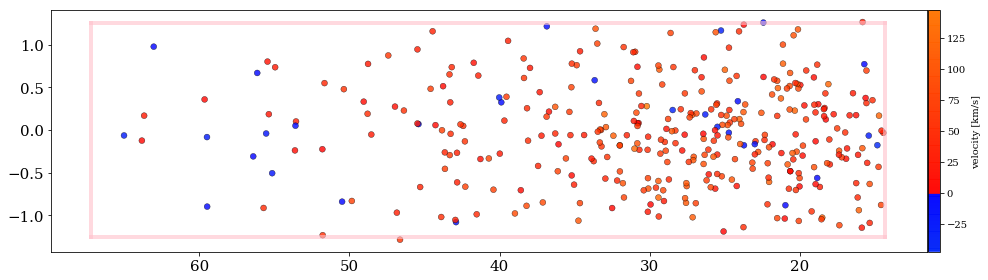

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['font.family'] = 'serif'
spla = stat_spla
lo_sp = np.array([float(x)-360 if float(x)>180 else float(x) for x in spla[1]])
la_sp = np.array([float(x) for x in spla[2]])
ex_sp = np.array([float(x) for x in spla[4]])
si_sp = np.array([float(x) for x in spla[7]])
i_sp = [] # +-2 deg -> +-1.25 deg
for i,b in enumerate(la_sp):
    if -1.25 <= float(b) <= 1.25:
        i_sp.append(i)

thor = stat_thor
lo_th = np.array([float(x)-360 if float(x)>180 else float(x) for x in spla[1]])
la_th = np.array([float(x) for x in thor[2]])
ex_th = np.array([float(x) for x in thor[4]])
fu_th = np.array([float(x) for x in thor[6]])
si_th = np.array([float(x) for x in thor[7]])
i_th  = [] # detection limit 0.03Jy -> X [0.23Jy (=splash)] O (65mJy*3*0.94)/ 1.5
i_th_ = [] # lower than (65mJy*3*0.94)/ 1.5

# Weighting Factor (degrade spectral reslution of ATCA 0.09ksm -> 1.5kms(THOR))
rms_sp = 0.065
sig_sp = 3
spec_width = 0.94 #kms (typical width of OH maser spectrum)
spec_reso_th = 1.5
detection_limit = round((rms_sp * sig_sp*spec_width)/spec_reso_th,3)
print('detection_limit in statistics is', detection_limit)

for i,f in enumerate(fu_th):
    if f>=detection_limit:
        i_th.append(i)
    else:
        i_th_.append(i)

spth = np.hstack([spla[:,i_sp],thor[:,i_th]])
nam = spth[0] # name 
lon = np.array([ float(x)-360 if float(x) > 180 else float(x) for x in spth[1]]) # longitude (galactic coordinate)
lat = np.array([ float(x) for x in spth[2]]) # latitude  (galactic coordinate)
lat_thor_low = np.array([float(x) for x in thor[2,i_th_]])
rad = np.array([ float(x) for x in spth[3]]) # radial velocity 
exp = np.array([ float(x) for x in spth[4]]) # expansion velocity
unc = np.array([ float(x) for x in spth[5]]) # uncertainty
flu = np.array([ float(x) for x in spth[6]]) # peak flux density 
siz = np.array([ round(float(x),3) for x in spth[7]]) # apperant size of maser source in arcsec
num = np.array([ float(x) for x in spth[8]]) # number of maser spots

stat = np.array([nam,lon,lat,rad,exp,unc,flu,siz,num])
#np.save('./stat.npy',stat)

##############################
# Let's draw THOR region ! #
##############################

linewidth = 4
alpha     = 0.6  # transparancy

lines_thor = [{'l':[-14.35,-14.35],'b':[-1.25,1.25]}, {'l':[-14.35, -67.25],'b':[1.25,1.25]},
             {'l':[-67.25,-67.25], 'b':[1.25,-1.25]}, {'l':[-14.35, -67.25], 'b':[-1.25,-1.25]},
            ]
def thor_stat(ax):
    linecolor = 'pink'
    for i, coord in enumerate(lines_thor):
        ax.plot(np.array(coord['l']),np.array(coord['b']), linewidth=linewidth,color=linecolor, alpha=alpha)

        
fig         = plt.figure(figsize=(14,4))
xticks      = [ -60,-50,-40,-30,-20,-10]
xticklabels = [str(-x) for x in xticks ]
ax = fig.add_subplot(111, xticks=xticks, xticklabels=xticklabels)
mapable = ax.scatter(-lon[len(i_sp):], lat[len(i_sp):], c=rad[len(i_sp):], alpha = 0.8, s=35, cmap=velc, edgecolors='black', linewidth=0.4)
pp = fig.colorbar(mapable, orientation='vertical',pad=0.001,fraction=0.07, label = 'velocity [km/s]')
pp.set_clim(-320,320)
plt.tick_params(labelsize=15)
plt.tight_layout()
thor_stat(ax)
print('Number of OH/IR stars in ')
print('THOR: ', len(spth[0][len(i_sp):]),'SPLASH:',len(i_sp))
plt.show()

### SPLASH/THOR statistics field Summary

number of stars in THOR/SPLASH site: 729


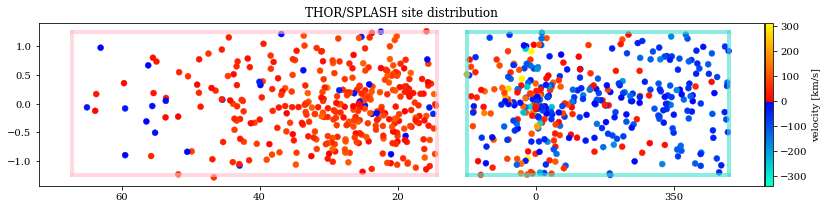

In [23]:
xticks      = [-60,-40,-20,0,20,40]
xticklabels = ['60','40','20','0','350','330']
fig = plt.figure(figsize=(14,3))
ax  = fig.add_subplot(111,xticks=xticks,xticklabels=xticklabels,title='THOR/SPLASH site distribution')
mapable = ax.scatter(-lon, lat,c=rad,cmap=velc,linewidth=0.4)
pp = fig.colorbar(mapable, orientation='vertical',pad=0.001,fraction=0.07, label = 'velocity [km/s]')
pp.set_clim(-320,320)
splash_stat_(ax)
thor_stat(ax)
print('number of stars in THOR/SPLASH site:', len(lon))
plt.show()

### 1.3 Figures 

#### Fig1

<IPython.core.display.Javascript object>


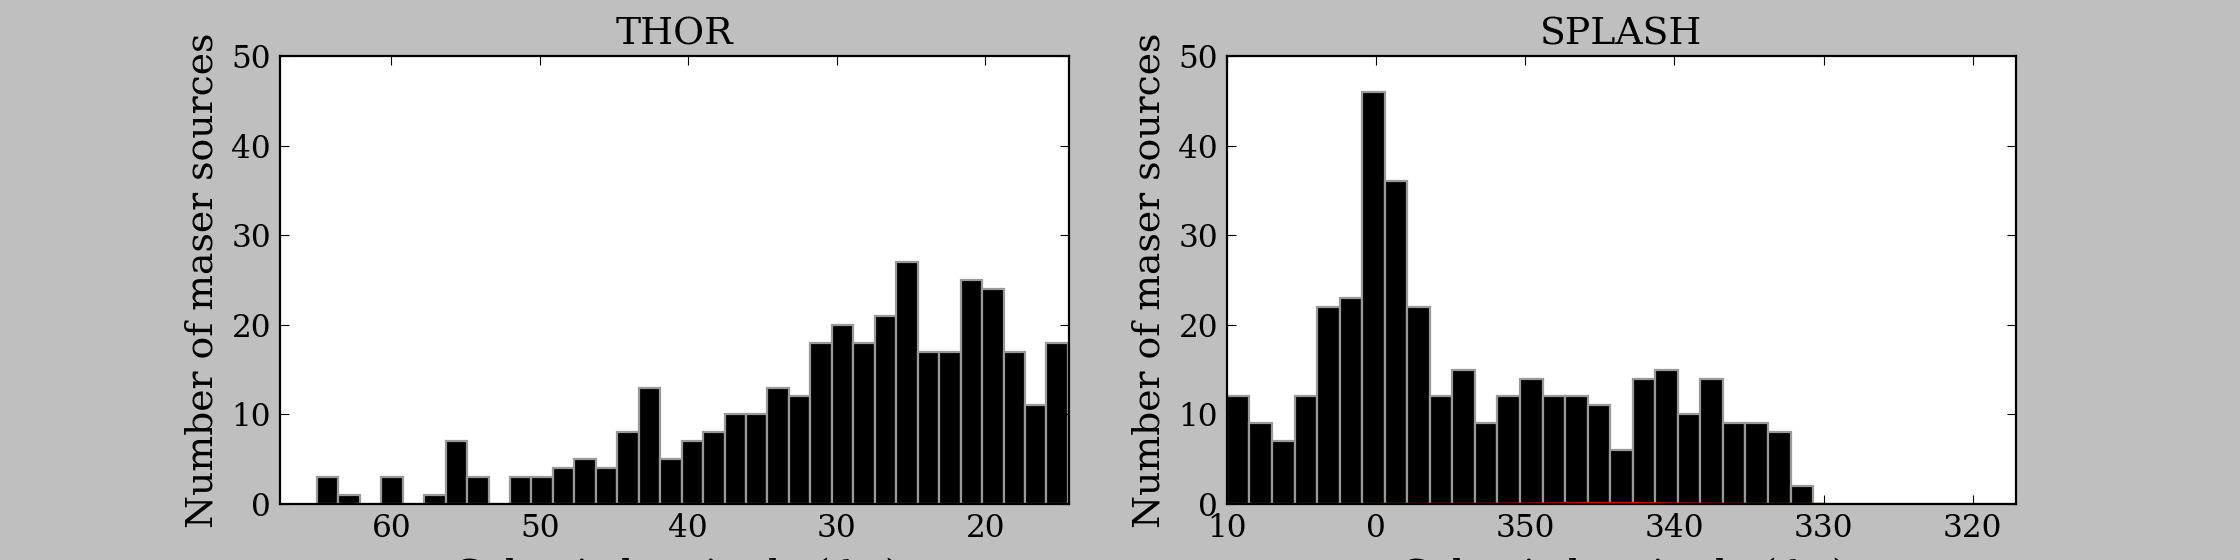

thor: 356 splash: 373
total: 729


In [34]:
rcParams['font.family'] = 'serif'
bin_num  = 35
fontsize=17
labelsize=14
fig = plt.figure(figsize=(14,3.5))
xticksl = [-60, -50, -40, -30, -20, -10, 0, 10, 20]
xticklabelsl = ['60', '50', '40', '30', '20', '10','0', '350','340']
axl = fig.add_subplot(121, xticks=xticksl,xticklabels=xticklabelsl)
xticksr = [ -10,  0, 10,  20,30,40]
xticklabelsr = ['10','0', '350',  '340','330','320']
axr = fig.add_subplot(122,xticks=xticksr,xticklabels=xticklabelsr)
axl.set_xlim([-67.5, -14.35])
axl.set_title('THOR',fontsize=fontsize)
axl.hist(-lon[len(i_sp):][np.where(flu[len(i_sp):]> 0.0)],bins=bin_num,linewidth=1,color='black',edgecolor='0.6')
axl.set_ylabel('Number of maser sources',fontsize=fontsize)
axl.set_xlabel('Galactic longitude ($deg$)', fontsize=fontsize)
axl.set_ylim([0,50])
axr.set_title('SPLASH',fontsize=fontsize)
axr.hist(-lon[:len(i_sp)], bins=bin_num, linewidth=1, range=([-10.0, 28+((67.25-14.35)-(28-(-10)))]), color='black', edgecolor='0.6')
axr.set_xlim([-10.0, 28+((67.25-14.35)-(28-(-10)))])
axr.set_ylabel('Number of maser sources',fontsize=fontsize)
axr.set_xlabel('Galactic longitude ($deg$)', fontsize=fontsize)
axr.set_ylim([0,50])
plt.style.use('_classic_test')
print('thor:',len(lon[len(i_sp):]),'splash:', len(i_sp))
print('total:',len(lon))
axl.tick_params(labelsize=labelsize)
axr.tick_params(labelsize=labelsize)
#plt.savefig('../../../../ohir_paper/Fig1.eps',dip=300,transparent=True,bbox_inches="tight")
plt.show()

#### Fig7

Expansion  elocity
mean: 14.9 median: 15.0
        Estimate  Std. Error       lwCI       upCI
mu     15.599387    0.122643  15.359011  15.839764
sigma   3.173768    0.100138   2.977502   3.370035
number of samples: 729


<IPython.core.display.Javascript object>


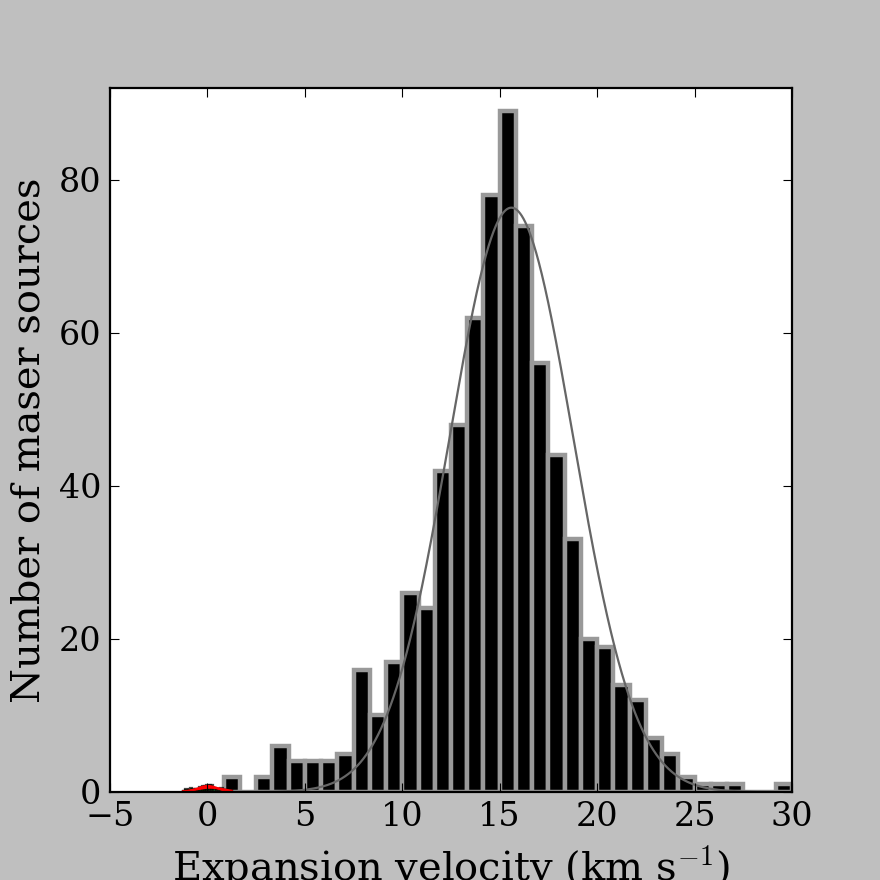

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm


bins = 36
density = True
exp_range  = ([0,30])
def gaussian_func(x,mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi))* np.exp(-(x-mu)**2/(2*sigma**2))

hist  = plt.hist(exp ,bins=bins,range=exp_range,density=density,alpha=0.7)

x  = hist[1]
y  = np.hstack([np.array([0]),hist[0]])

popt , pcov  = curve_fit(gaussian_func, x, y)

xd  = np.arange(x.min() ,x.max() ,0.01)
estimated  = gaussian_func(xd , popt[0] , popt[1] )
plt.plot(xd ,estimated ,color='r')
StdE  = np.sqrt(np.diag(pcov ))

# estimate 95% confidence interval
alpha=0.025
lwCI = popt  + norm.ppf(q=alpha)*StdE
upCI = popt  + norm.ppf(q=1-alpha)*StdE

# print result
mat  = np.vstack((popt ,StdE , lwCI , upCI )).T
df =pd.DataFrame(mat ,index=("mu", "sigma"),
                columns=("Estimate", "Std. Error", "lwCI","upCI"))

print('Expansion  elocity')
print('mean:',round(np.mean(exp),1),'median:',round(np.median(exp),1))
print(df )
print('number of samples:', len(exp))

# High/Low velocity distribution (latitude)

density = False
bin_num = 36
fontsize= 18
labelsize= 15
xrange= [0,30]
linewidth=linewidth
rcParams['font.family'] = 'serif'
#rcParams["legend.loc"] = 'upper left'

fig = plt.figure(figsize=(5.5,5.5))
axl = fig.add_subplot(111)
low = axl.hist(exp,bin_num, density=density, range=xrange,  color = '0', linewidth=2,linestyle='-',edgecolor='0.6')

width  = low[1][1] - low[1][0]
surfaceLo = np.sum([low[0][i]*width for i in range(len(low[0]))])

plt.plot(xd,estimated*surfaceLo,color='0.4', linestyle='-')



axl.set_xlabel('Expansion velocity (km s$^{-1}$)',fontsize=fontsize)
axl.set_ylabel('Number of maser sources',fontsize=fontsize)
plt.ylim(0,92)
plt.tick_params(labelsize=labelsize)
#plt.savefig('../../../../ohir_paper/Fig7.eps',transparent=False,dpi=300,bbox_inches='tight')

#print('high num:', len(i_hig),'low num:', len(i_low))
plt.show()

#### Fig8

       Estimate  Std. Error      lwCI      upCI
mu     0.020308    0.035454 -0.049180  0.089796
sigma  0.510709    0.029126  0.453624  0.567795
       Estimate  Std. Error      lwCI      upCI
mu     0.126197    0.077978 -0.026638  0.279032
sigma  0.700090    0.065751  0.571219  0.828960


<IPython.core.display.Javascript object>


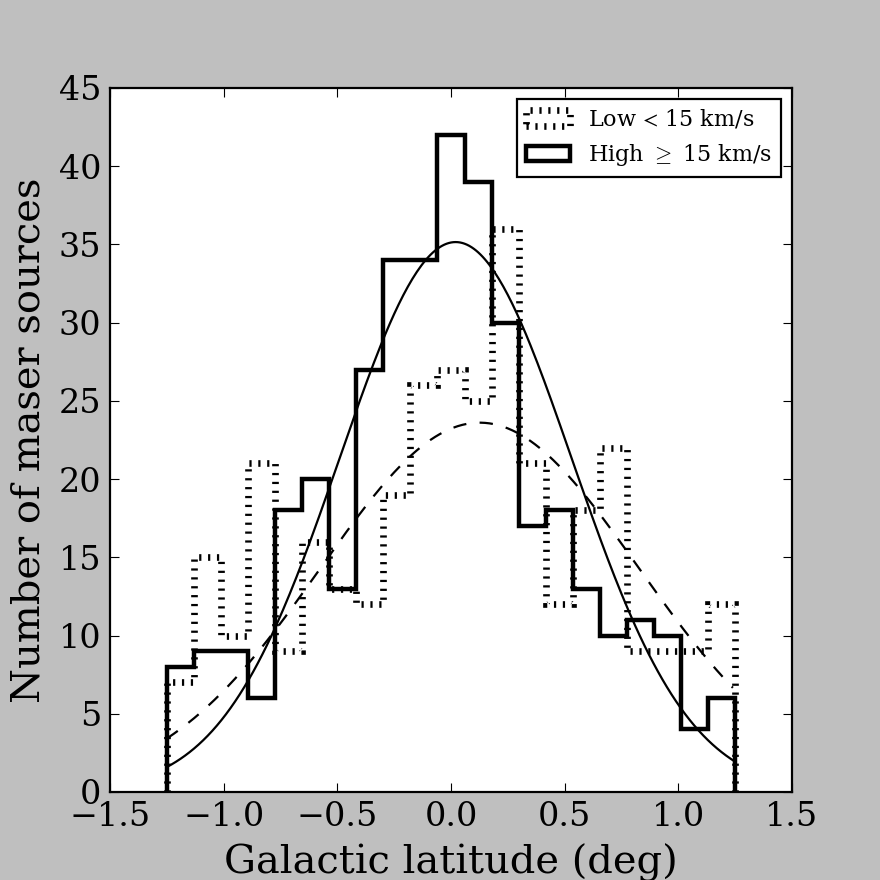

high num: 379 low num: 350


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

limit_vel = 15
lat_range = ([-1.25,1.25])
i_hig = []
i_low = []
bins = 21
density = True

for i, v in enumerate(exp):
    if v >= limit_vel:
        i_hig.append(i)
    else:
        i_low.append(i)



def gaussian_func(x,mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi))* np.exp(-(x-mu)**2/(2*sigma**2))

hist  = plt.hist(lat[i_hig],bins=bins,range=lat_range,density=density,alpha=0.7)
hist_ = plt.hist(lat[i_low],bins=bins,range=lat_range, density=density,alpha=0.7)

x  = hist[1]
y  = np.hstack([np.array([0]),hist[0]])
x_ = hist_[1]
y_ = np.hstack([np.array([0]),hist_[0]])

popt , pcov  = curve_fit(gaussian_func, x, y)
popt_, pcov_ = curve_fit(gaussian_func, x_,y_)

xd  = np.arange(x.min() ,x.max() ,0.01)
xd_ = np.arange(x_.min(),x_.max(),0.01)
estimated  = gaussian_func(xd , popt[0] , popt[1] )
estimated_ = gaussian_func(xd_, popt_[0], popt_[1])
plt.plot(xd ,estimated ,color='r')
plt.plot(xd_,estimated_,color='r')

StdE  = np.sqrt(np.diag(pcov ))
StdE_ = np.sqrt(np.diag(pcov_))

# estimate 95% confidence interval
alpha=0.025
lwCI = popt  + norm.ppf(q=alpha)*StdE
upCI = popt  + norm.ppf(q=1-alpha)*StdE
lwCI_ = popt_ + norm.ppf(q=alpha)*StdE_
upCI_ = popt_ + norm.ppf(q=1-alpha)*StdE_

# print result
mat  = np.vstack((popt ,StdE , lwCI , upCI )).T
mat_ = np.vstack((popt_,StdE_, lwCI_, upCI_)).T
df =pd.DataFrame(mat ,index=("mu", "sigma"),
                columns=("Estimate", "Std. Error", "lwCI","upCI"))
df_=pd.DataFrame(mat_,index=("mu", "sigma"),
                columns=("Estimate", "Std. Error", "lwCI","upCI"))


print(df )
print(df_)

# High/Low velocity distribution (latitude)
limit_vel = 15
i_hig = []
i_low = []
range_lat = ([-1.25,1.25])

for i, v in enumerate(exp):
    if v >= limit_vel:
        i_hig.append(i)
    else:
        i_low.append(i)


density = False
bin_num = 21
fontsize= 18
labelsize= 15
linewidth= 2
rcParams['font.family'] = 'serif'
rcParams["legend.loc"] = 'upper left'

fig = plt.figure(figsize=(5.5,5.5))
axl = fig.add_subplot(111)
low = axl.hist(lat[i_low],bin_num, density=density, range=range_lat, histtype='step', color = 'black', linewidth=linewidth+1,label='Low $\less$ ' + str(limit_vel) + ' km/s',linestyle=':')
hig = axl.hist(lat[i_hig],bin_num, density=density, range=range_lat, histtype='step', color = 'black', linewidth=linewidth, label = 'High $\geq$ ' + str(limit_vel) +' km/s', linestyle='-')


width  = hig[1][1] - low[1][0]
surfaceHi = np.sum([hig[0][i]*width for i in range(len(hig[0]))])
surfaceLo = np.sum([low[0][i]*width for i in range(len(low[0]))])
plt.plot(xd ,estimated *surfaceHi,color='0')
plt.plot(xd_,estimated_*surfaceLo,color='0', linestyle='--')



axl.set_xlabel('Galactic latitude (deg)',fontsize=fontsize)
axl.set_ylabel('Number of maser sources',fontsize=fontsize)
axl.legend(fontsize=10, loc=1)
plt.ylim([0,45])
plt.tick_params(labelsize=labelsize)
#plt.savefig('../../../../ohir_paper/Fig8.eps',transparent=False,dpi=300,bbox_inches='tight')
print('high num:', len(i_hig),'low num:', len(i_low))
plt.show()

## 2. Scale height estimation
### 2.1 Model (K-S test)

** near distance **
scale length 22   kpc
scale height 150 pc

** number of stars **
thor 356 splash 373 total 729

** detection limit **
stat 0.122 ska 0.01 Jy
Number of given stars     : 3990
Number of observable stars: STAT: 1434 (36%) SKA: 3210 (80%)
       in statistics field: STAT: 728 (18%) SKA: 1543 (39%)

** number of stars in statistics field without GC **
REAL 575 MODEL 575


<IPython.core.display.Javascript object>


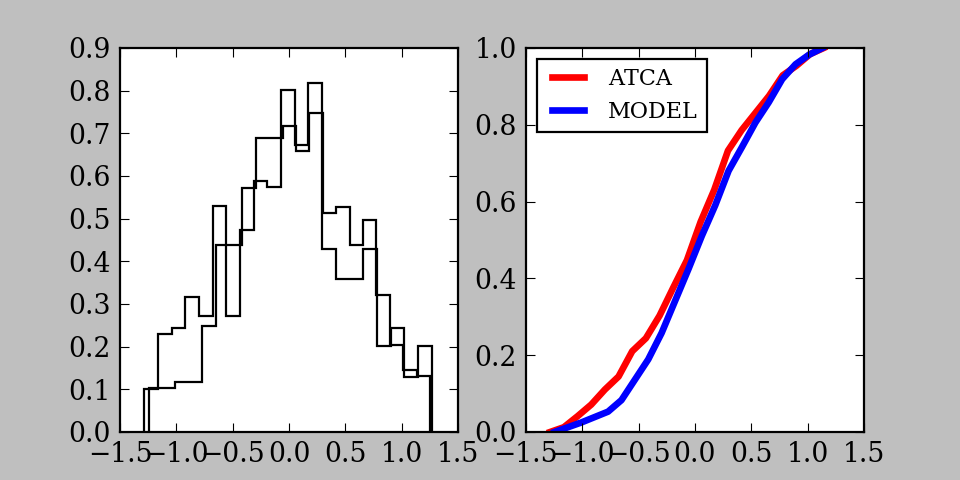

** p-value **

0.5309076214637048


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from scipy import stats
%matplotlib notebook

   ########################
   #  initial parameters  #
   ########################

MOD = 'near' # 'near' or 'far'
GC  = 4 # [deg] degree of data removal towards GC
NUM = 3990 # stars in a model (3990 when R:22, H=0.15 (near),)
R   = 22 # [kpc] scale length
H   = 0.15 # Scale height [kpc]
std = round(H/np.sqrt(2),4)
SUN = np.array([0, -8.2, -0.017])

STA = np.load('./data/stat.npy') # name, longitude, latitude, radial velocity, expansion velocity, uncertainty, flux, size, spot number
na  = STA[0]
lo  = np.array([float(x)-360 if float(x)>180 else float(x) for x in STA[1]])
la  = np.array([float(x) for x in STA[2]])
fu  = np.array([float(x) for x in STA[6]])
sp  = len(lo[lo<10])
rms_sp = 0.065 #Jy
sig_sp = 3
spec_width = 0.94 #kms
spec_reso_th = 1.5
detection_limit = round((rms_sp * sig_sp * spec_width)/spec_reso_th,3)
DL      = {'STA':detection_limit,'SKA':0.01} # 0.07 Jy for ATCA, 0.065 for SPLASH
bins      = 21 # Number of bins of histgram to K-S test.
LU      = {'near':{'MEAN':15.3,'STD':0.531},'far':{'MEAN':15.5, 'STD':0.531}}  #  luminosity
kpc_pc  = 1000
pc_m    = 3.0 * 10 ** 16
W_Jy    = 10 ** 26
WJy_pcm2 = W_Jy / (kpc_pc ** 2 * pc_m **2)



   ########################
   #        MODEL         #
   ########################


np.random.seed(777)
theta    = np.random.uniform(0, 2*np.pi, NUM)
np.random.seed(778)
r        = np.random.exponential(R,NUM)
mx, my   = r * np.cos(theta), r * np.sin(theta)
np.random.seed(779)
mz       = np.random.normal(loc=0, scale=std, size=NUM )
# making the sun in the middle
mx_, my_, mz_ = mx-SUN[0], my-SUN[1], mz-SUN[2]
np.random.seed(780)
lu_log10 = np.random.normal(loc=LU[MOD]['MEAN'], scale=LU[MOD]['STD'], size=NUM)




   #################################
   #        VISUALIZATION          #
   #################################

lines = [{'l':[28,28], 'b':[-1.25,1.25]},{'l':[GC,GC], 'b':[-1.25,1.25]},
         {'l':[28,GC], 'b':[-1.25,-1.25]},{'l':[28,GC], 'b':[1.25,1.25]},
         {'l':[-GC,-GC], 'b':[-1.25,1.25]},{'l':[-10,-10], 'b':[-1.25,1.25]},
         {'l':[-10,-GC], 'b':[-1.25,-1.25]},{'l':[-10,-GC], 'b':[1.25,1.25]},
         {'l':[-67.25,-67.25], 'b':[-1.25,1.25]}, {'l':[-14.35,-14.35], 'b':[-1.25,1.25]},
         {'l':[-67.25,-14.35], 'b':[-1.25,-1.25]},{'l':[-67.25,-14.35], 'b':[1.25,1.25]}]
    
def stat_draw(ax): 
    color = 'gray'
    linewidth=4
    alpha = 0.6
    for i, coord in enumerate(lines):
        plt.plot(np.array(coord['l']), np.array(coord['b']), linewidth=linewidth,  color=color, alpha=alpha)



# Mean value of luminosity function from Engels and Bunzel, 2015.
# Std derived from FWHM_L / (2*np.sqrt(2*np.log(2))), 
# FWHM_L = 1.25 # FWHM value of luminosity function from E&B 2015
print('**',MOD,'distance','**')
print('scale length', R,'  kpc')
print('scale height', int(H*1000), 'pc')
print('')
print('** number of stars **')
print('thor',len(na)-sp,'splash',sp,'total',len(na))
print('')
print('** detection limit **', )
print('stat',DL['STA'],'ska',DL['SKA'],'Jy')




# Distance from the Sun
r_xyz   = np.sqrt(mx_**2 + my_**2 + mz_**2)
D2      = r_xyz **2 * kpc_pc**2 * pc_m**2 # kpc to m
mf      = (10**lu_log10*W_Jy)/(4*np.pi*D2)
i_obsta_all  = np.where(mf > DL['STA'])[0] # observable sources in all sky at 230mJy detection limit
i_obska_all = np.where(mf > DL['SKA'])[0] # observable sources in all sky at 10mJy detection limit

# Galactic coordinte 
r_xy    = np.sqrt(mx_**2 + my_**2)
ml      = np.array([np.arccos(my_[i]/r_xy[i])*360/(2*np.pi) if mx_[i]<0 else -np.arccos(my_[i]/r_xy[i])*360/(2*np.pi) for i in range(len(my_)) ])
mb      = np.arcsin(mz_/r_xyz)*360/(2*np.pi)

# how many sources in a field?
i_obsta_sta = [] # observable sources in statistics field at 230mJy detection limit
i_obska_sta = []# observable sources in statistics field at 10mJy detection limit

for i in i_obsta_all:
    if 14.35<=ml[i]<=67.25 or -28<=ml[i]<=10:
        if -1.25 <= mb[i]<= 1.25:
            i_obsta_sta.append(i)

for i in i_obska_all:
    if 14.35<=ml[i]<=67.25 or -28<=ml[i]<=10:
        if -1.25 <= mb[i]<= 1.25:
            i_obska_sta.append(i)
            
i_notgc = []
for i,l in enumerate(lo):
    if not -GC < l < GC:
        i_notgc.append(i)
i_notgc_ = []
for i in i_obsta_sta:
    if not -GC < ml[i] < GC:
        i_notgc_.append(i)


print('Number of given stars     :', NUM)
print('Number of observable stars:', 'STAT:',len(i_obsta_all),'('+str(round(len(i_obsta_all)/NUM*100))+'%)','SKA:',len(i_obska_all),'('+str(round(len(i_obska_all)/NUM*100))+'%)')
print('       in statistics field:', 'STAT:',len(i_obsta_sta), '('+str(round(len(i_obsta_sta)/NUM*100))+'%)','SKA:',len(i_obska_sta),'('+str(round(len(i_obska_sta)/NUM*100))+'%)\n')
print('** number of stars in statistics field without GC **')
print('REAL',len(i_notgc),'MODEL',len(i_notgc_))



   ########################
   #        K-S test      #
   ########################

density = True
bins = 21
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(121)
real_hist = ax.hist(la[i_notgc],density=density ,bins=bins, histtype="step",color='black')
model_hist = ax.hist(mb[i_notgc_], density=density,bins=bins, histtype='step', color='black')

   ###########################
   # cumulative distribution #
   ###########################

real_cum = np.empty(len(real_hist[0]))
cum = 0
for i,j in enumerate(real_hist[0]):
    real_cum[i] = cum
    cum += j
real_cum_norm = real_cum/(real_cum.max() - real_cum.min())

model_cum = []
cum_ = 0
for i in model_hist[0]:
    model_cum.append(cum_)
    cum_ += i
model_cum = np.array(model_cum)
model_cum_norm = model_cum/(model_cum.max() - model_cum.min())
ax2 = fig.add_subplot(122)
ax2.plot(real_hist[1][:-1],real_cum_norm,linewidth=3, color='red',label='ATCA')
ax2.plot(model_hist[1][:-1], model_cum_norm,linewidth=3, color = 'blue',label='MODEL')
ax2.legend(loc='upper left',fontsize=10)


#plt.style.use('classic')
pval  = stats.ks_2samp(real_hist[0], model_hist[0]).pvalue
print('** p-value **\n')
print(pval)

<IPython.core.display.Javascript object>


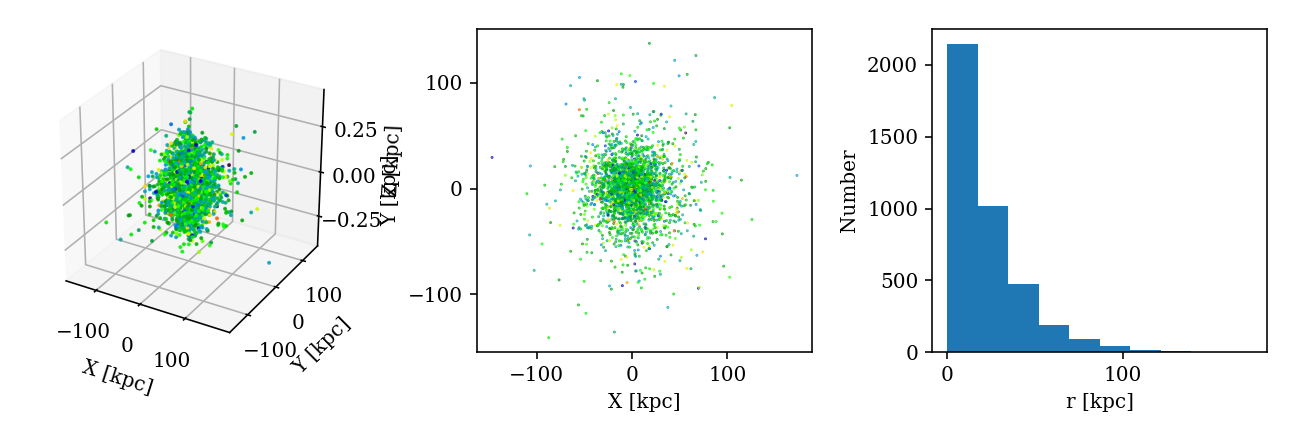

<IPython.core.display.Javascript object>


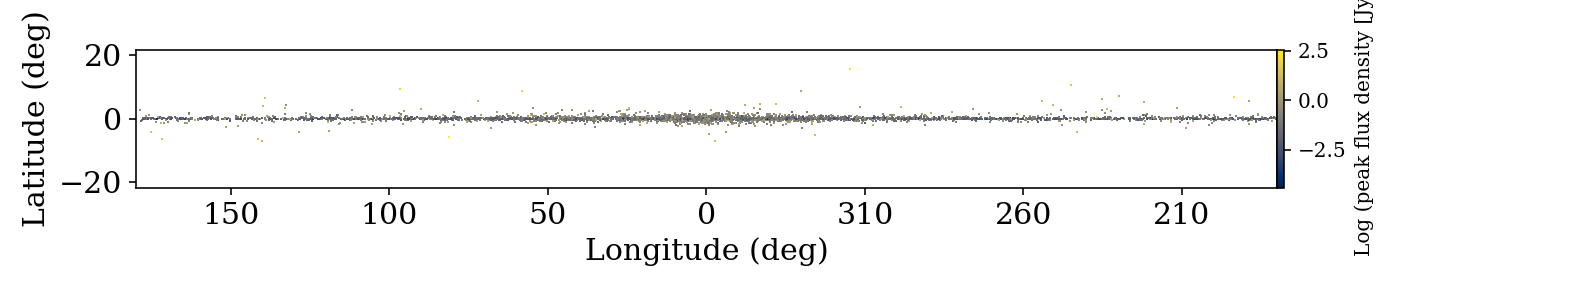

<IPython.core.display.Javascript object>


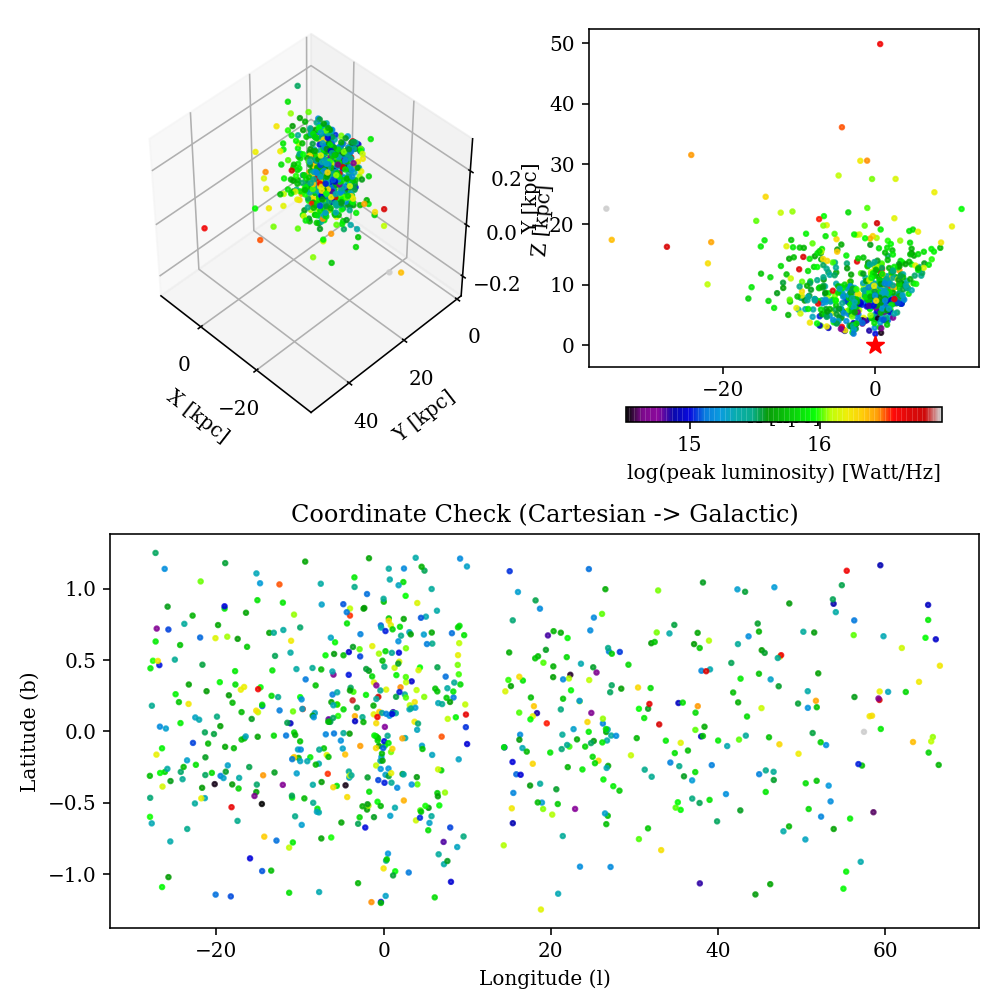

<IPython.core.display.Javascript object>


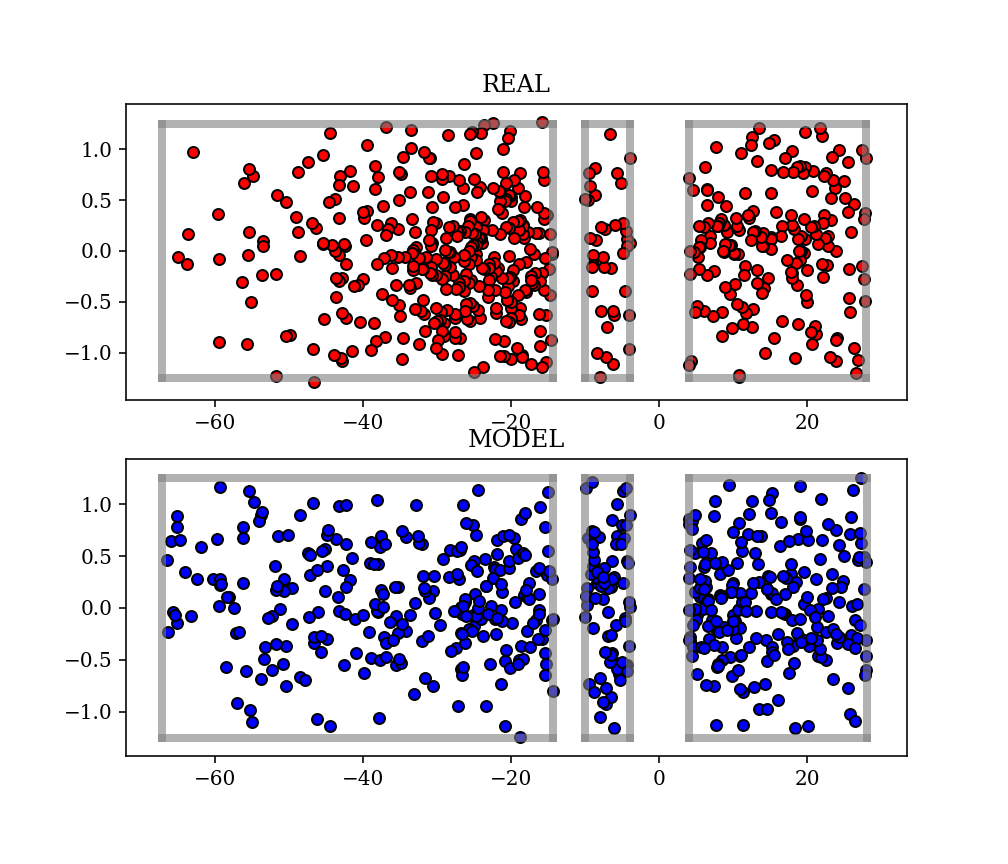

In [32]:
   #################################
   #        VISUALIZATION          #
   #################################


cmap = 'nipy_spectral'
fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(131, projection='3d')
sc  = ax1.scatter(mx,my,zs=mz, zdir='z', c=lu_log10, cmap=cmap, alpha=0.8, s=1)
ax1.set_xlabel('X [kpc]')
ax1.set_ylabel('Y [kpc]')
ax1.set_zlabel('Z [kpc]')
#  looked from above
ax2 = fig.add_subplot(132)
sc  = ax2.scatter(mx, my, c=lu_log10, cmap=cmap, alpha=0.8, s=0.2)
ax2.set_xlabel('X [kpc]')
ax2.set_ylabel('Y [kpc]')
#  X-Y plane density
ax3 = fig.add_subplot(133)
z3  = ax3.hist(r)
ax3.set_xlabel('r [kpc]')
ax3.set_ylabel('Number')

plt.tight_layout()


rcParams['font.family'] = 'serif'
cmap = 'cividis'
linewidth = 0
fig = plt.figure(figsize=(11,2))
ax = fig.add_subplot(111)
sc = ax.scatter(-ml,mb,c=np.array([np.log10(x) for x in mf]),marker='s', s=1, cmap=cmap, linewidth=linewidth)
ax.set_xlabel('Longitude (deg)',size=15)
ax.set_ylabel('Latitude (deg)',size=15)
ax.set_xlim(-180,180)
ax.set_ylim(-10,10)
pp = plt.colorbar(sc, orientation='vertical', pad=0, fraction = 0.2, label = 'Log (peak flux density [Jy])')
plt.xticks([-150, -100, -50, 0, 50, 100, 150], ["150","100","50", "0", "310", "260","210"])
plt.tick_params(labelsize=15)
plt.tight_layout()
plt.axes().set_aspect('equal', 'datalim')

fig = plt.figure(figsize=(7,7))
cmap = 'nipy_spectral'
s = 5
c = lu_log10[i_obsta_sta]
alpha = 0.8
gs  = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[1,1], height_ratios=[1,1])
ax1 = fig.add_subplot(gs[0,0,], projection='3d')
sc  = ax1.scatter(mx_[i_obsta_sta],my_[i_obsta_sta],zs=mz[i_obsta_sta], zdir='z', c=c, cmap=cmap, alpha=alpha, s=s)
ax1.set_xlabel('X [kpc]')
ax1.set_ylabel('Y [kpc]')
ax1.set_zlabel('Z [kpc]')
ax1.view_init(elev=45, azim=135)

# LOOK from above
ax2 = fig.add_subplot(gs[0,1])
sc = ax2.scatter(mx_[i_obsta_sta],my_[i_obsta_sta], c=c, cmap=cmap , alpha=alpha, s=s)
sun_posi = ax2.scatter(x=0.0, y=0.0, color ='red', marker='*', s=80)
ax2.set_xlabel('X [kpc]')
ax2.set_ylabel('Y [kpc]')
plt.colorbar(sc, orientation='horizontal', pad=0.1, fraction = 0.04, label = 'log(peak luminosity) [Watt/Hz]')
plt.tight_layout()

ax3 = fig.add_subplot(gs[1:,:])
ax3.set_title('Coordinate Check (Cartesian -> Galactic)')
sc = ax3.scatter(ml[i_obsta_sta], mb[i_obsta_sta], c=c, alpha=alpha, s=s, cmap=cmap)
#plt.colorbar(sc, orientation='horizontal', pad=0.1, fraction = 0.04, label = 'Log(peak luminosity[W/Hz])')
plt.xlabel('Longitude (l)')
plt.ylabel('Latitude (b)')
plt.tight_layout()

fig = plt.figure(figsize=(7,6))  
ax1 = fig.add_subplot(211)
stat_draw(ax1)
sc1 = ax1.scatter(-lo[i_notgc],la[i_notgc], color='red', s=30, edgecolors='black')
ax1.set_title('REAL')
ax2 = fig.add_subplot(212)
stat_draw(ax2)
sc2 = ax2.scatter(-ml[i_notgc_],mb[i_notgc_], color='blue', s=30, edgecolors='black')
ax2.set_title('MODEL')
plt.show()



### 2.2 Model (Kinematic Distance)
Wenger et al. (2018) <a href>https://github.com/tvwenger/kd</a>

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
import pylab as plb
from pylab import rcParams
from kd import pdf_kd
from tqdm import tqdm_notebook as tqdm
import pickle


#stat = np.array([nam,lon,lat,rad,exp,unc,flu,siz,num])
stat           = np.load('./data/stat.npy')
nam = stat[0]
lon = np.array([float(x)-360 if float(x) > 180 else float(x) for x in stat[1]])
lat = np.array([float(x) for x in stat[2]])
rad = np.array([float(x) for x in stat[3]])
vex = np.array([float(x) for x in stat[4]])
unc = np.array([float(x) for x in stat[5]])
i_kinedis = []
gc = 4
for i,l in enumerate(lon):
    if not -gc<l<gc:
        i_kinedis.append(i)

rotation_curve = 'reid19_rotcurve'
num_samples    = 10000
vel_err        = round(np.median(unc)) # 4
print('velocity err:', vel_err)



result = []
substitute = {'Rgal': np.nan,        # when galactic longitude = 89.99, kinematic distance can not be derived (ERROR)
              'Rgal_kde': None,
              'Rgal_err_neg': np.nan,
              'Rgal_err_pos': np.nan,
              'Rtan': np.nan,
              'Rtan_kde': None,
              'Rtan_err_neg': np.nan,
              'Rtan_err_pos': np.nan,
              'near': np.nan,
              'near_kde': None,
              'near_err_neg': np.nan,
              'near_err_pos': np.nan,
              'far': np.nan,
              'far_kde': None,
              'far_err_neg': np.nan,
              'far_err_pos': np.nan,
              'tangent': np.nan,
              'tangent_kde': None,
              'tangent_err_neg': np.nan,
              'tangent_err_pos': np.nan,
              'vlsr_tangent': np.nan,
              'vlsr_tangent_kde': None,
              'vlsr_tangent_err_neg': np.nan,
              'vlsr_tangent_err_pos': np.nan}

#for i in tqdm(range(len(i_kinedis))):
#    try:
#        result.append(pdf_kd.pdf_kd(lon[i_kinedis][i], rad[i_kinedis][i], velo_err = vel_err, rotcurve= rotation_curve, num_samples=num_samples))
#        #print(str(i)+': ','near distance is ', result[i]['near'])
#        #print(str(i)+': ','far  distance is ', result[i]['far'])
#    except:
#        #print(str(i)+': ', 'ERR, putting substitute')
#        result.append(substitute)
   
## SAVING DATA
#with open("./data/kinedis.pkl", "wb") as f:
#    pickle.dump(result, f) #保存

with open("./data/kinedis.pkl", "rb") as f:
    result = pickle.load(f) #読み出し
nea = np.array([x['near'] for x in result])
far = np.array([x['far']  for x in result])

i_nea, i_nea_ = [], []
i_far, i_far_  = [], []
i_nea_far_nan = []
for i in range(len(result)):
    if np.isnan(nea[i]):
        i_nea_.append(i)
    else:
        i_nea.append(i)
    if np.isnan(far[i]):
        i_far_.append(i)
    else:
        i_far.append(i)
    if np.isnan(nea[i]) and np.isnan(far[i]):
        i_nea_far_nan.append(i)
print('near:',len(i_nea),'nan:',len(i_nea_),'ratio', str(len(i_nea_))+'/'+str(len(nea))+':',round((len(i_nea_)/len(nea))*100,1),'%')
print('far :',len(i_far),'nan:',len(i_far_),'ratio',str(len(i_far_))+'/'+str(len(far))+':',round(len(i_far_)/len(far),3)*100,'%')
print('near/far nan :',len(i_nea_far_nan),'ratio',str(len(i_nea_far_nan))+'/'+str(len(nea))+':',round(len(i_nea_far_nan)/len(nea),3)*100,'%')
print('only far     :',len(i_nea_)-len(i_nea_far_nan),'ratio',str(len(i_nea_)-len(i_nea_far_nan))+'/'+str(len(nea))+':',round((len(i_nea_)-len(i_nea_far_nan))/len(nea)*100,1),'%')

velocity err: 4.0
near: 495 nan: 80 ratio 80/575: 13.9 %
far : 527 nan: 48 ratio 48/575: 8.3 %
near/far nan : 48 ratio 48/575: 8.3 %
only far     : 32 ratio 32/575: 5.6 %


### 2.3 Figures

#### Fig2

<IPython.core.display.Javascript object>


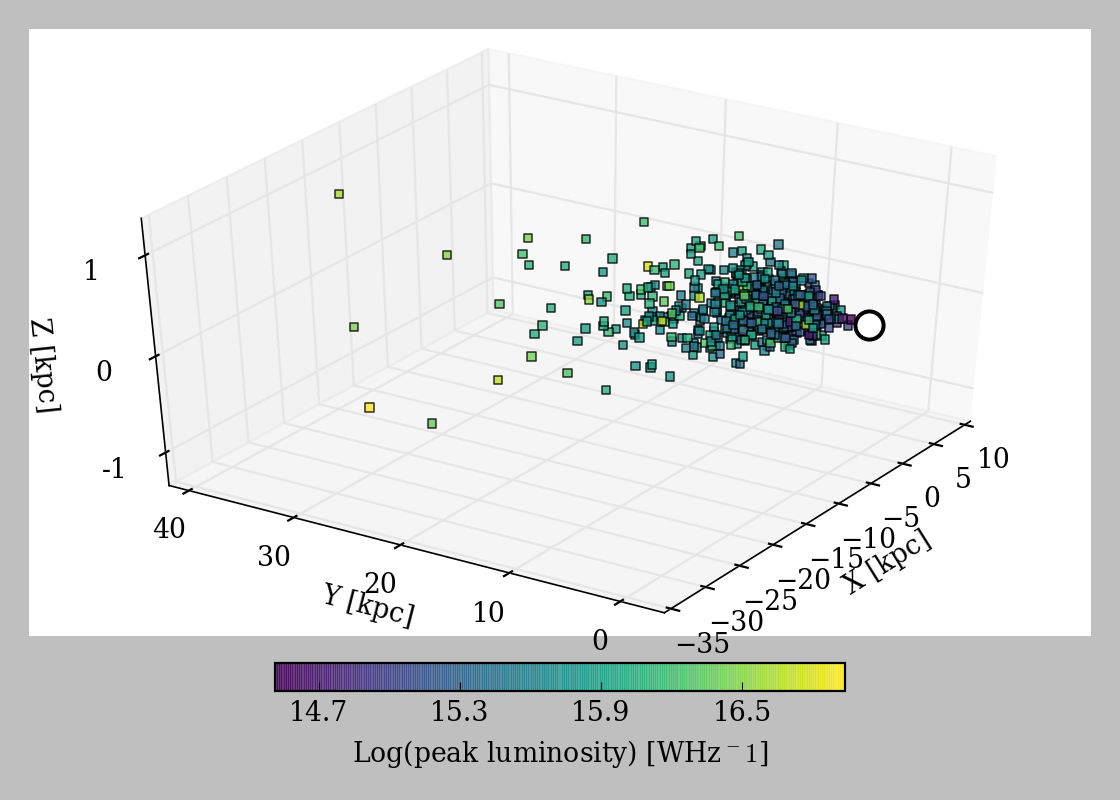

In [51]:
fig = plt.figure(figsize=(7,5))
plt.style.use('classic')
cmap = 'viridis'
s = 14
c = lu_log10[i_obsta_sta]
alpha = 0.8
zticks=[-1,0,1]
zticklabels=['-1','0','1']
rcParams['font.family'] = 'serif'
ax = fig.add_subplot(111,projection='3d',zticks=zticks,zticklabels=zticklabels)
sc = ax.scatter(mx_[i_obsta_sta],my_[i_obsta_sta],zs=mz[i_obsta_sta], 
                zdir='z', c=c, marker='s', cmap=cmap, alpha=alpha, s=s,linewidth=0.7)
ax.scatter(xs=0, ys=0, zs=0, color='white', marker='o', s=160,edgecolor='black',linewidth=1.8)
ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.set_zlabel('Z [kpc]')
ax.set_zlim(-1.3,1.3)
ax.set_ylim(-3,41)
ax.set_xlim(-35,10)
cbar = fig.colorbar(sc,orientation='horizontal',pad=0.04,fraction=0.043,ticks=[14.7, 15.3, 15.9, 16.5, 17.1 ], label = 'Log(peak luminosity) [WHz$^-1$]')
ax.view_init(elev=39, azim=-147)
plt.tight_layout()
#plt.savefig('../../../../ohir_paper/Fig2.eps',dpi=300)
plt.tight_layout()
plt.show()

#### Fig3

<IPython.core.display.Javascript object>


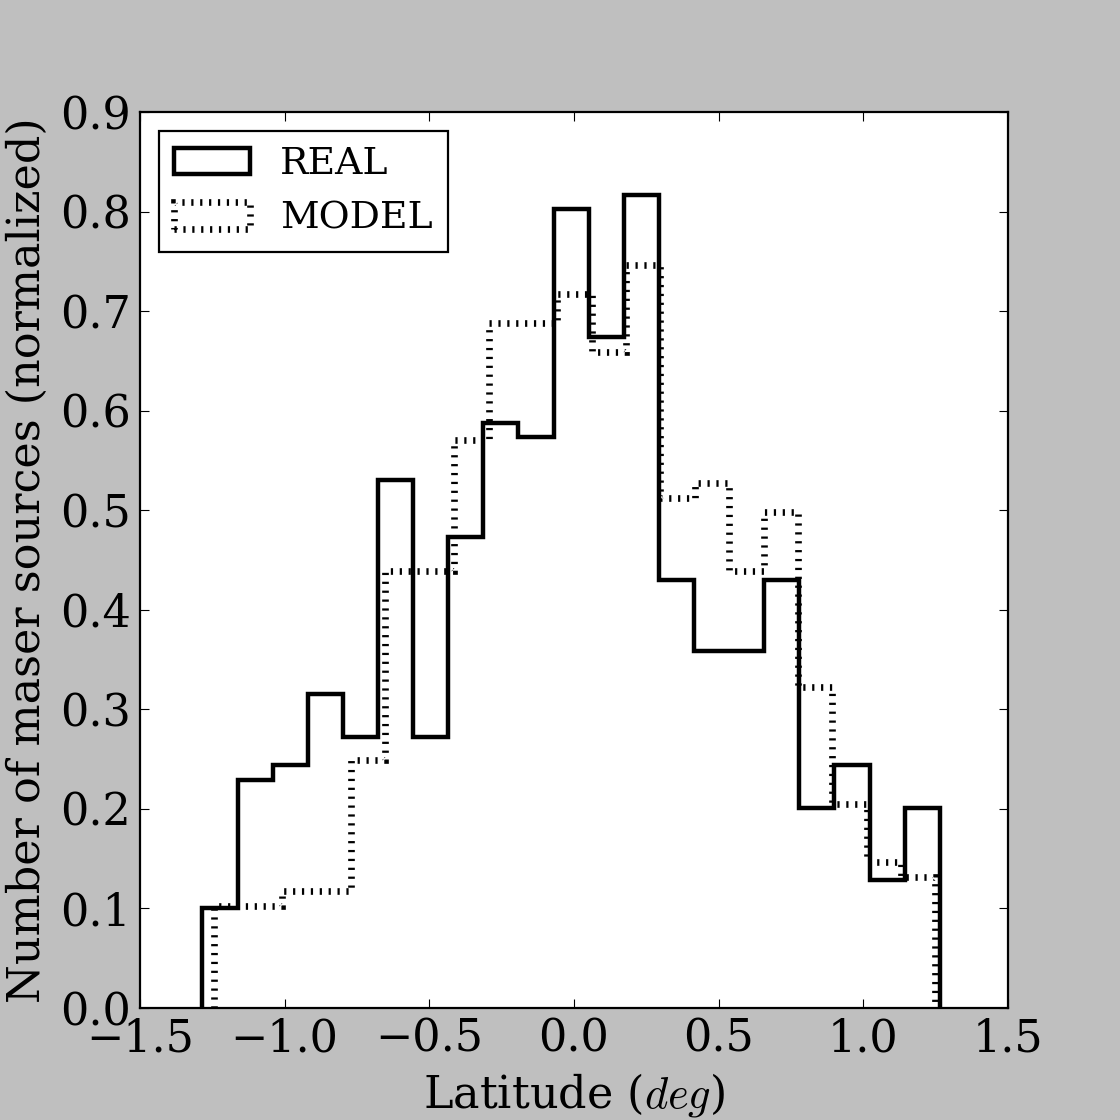

K-S test result is:  0.530908


In [47]:
density = True # True/False: normalized on or off
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
real_hist = ax1.hist(la[i_notgc],bins, density = density,histtype='step', color = 'k', linewidth=2,label='REAL')
model_hist = ax1.hist(mb[i_notgc_], bins, density = density, histtype='step', color = 'black', linewidth=3, label = 'MODEL',linestyle=':')

ax1.set_xlabel('Latitude ($deg$)',fontsize=20)
ax1.set_ylabel('Number of maser sources (normalized)',fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=17)
#plt.style.use('_classic_test')
#ax1.text(-1.9,0.71, r'${\rm Scale \,height=300\,pc} $',fontsize=18,color='black',fontdict = {'family':'serif','style':'italic'})
#ax1.text(-1.9,0.66, r'${\rm Scale \, length =\,23\,kpc} $',fontdict = {'family':'serif', 'color':'black','size':'18'})
plt.show()
print('K-S test result is: ',round(stats.ks_2samp(real_hist[0], model_hist[0]).pvalue,6))

#### Fig. 4

confidense level is 90.0
scale height (near) 90.0 pc to  290.0  pc


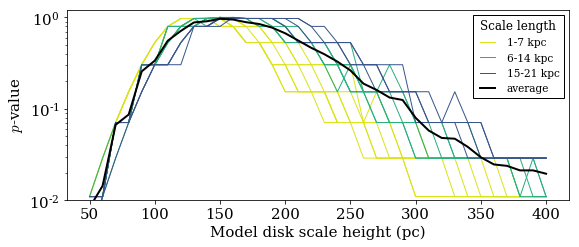

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pylab import rcParams
rcParams['font.family'] = 'serif'

fontsize = 15
figsize  = (9,3.5)
X = np.arange(0.05, 0.401, 0.01)
Y_ = np.arange(1,21.01,1)

nea_pd = pd.read_pickle('./data/sh_res_nea.pkl')
nea_ary = nea_pd.values


nea_ary_ = np.sum(nea_ary, axis=1)/len(Y_)
label= [str(i) for i in range(len(Y_))]
fig = plt.figure(figsize=figsize)
xticks =[(i*0.05)+0.05 for i in range(8)]
xticklabels = [str((i*50)+50) for i in range(8)]
axl = fig.add_subplot(111, xticks=xticks, xticklabels=xticklabels)

color1 = '#DCE319FF'
color2 = '#29AF7FFF'
color3 = '#39568CFF'
color4 = 'black'

linewidth = 1
for i in range(len(nea_ary[0])):
    Yn = nea_ary[:,i]
    if i == 0:
        axl.plot(X,Yn,label='1-7 kpc',color=color1,linewidth=linewidth)
    if i < 7:
        axl.plot(X,Yn, color=color1,linewidth=linewidth)
    if i == 7:
        axl.plot(X,Yn,label='6-14 kpc',color=color2,linewidth=linewidth)
    if 7 <i < 14:
        axl.plot(X,Yn, color=color2,linewidth=linewidth)
    if i == 14:
        axl.plot(X,Yn,label='15-21 kpc',color=color3,linewidth=linewidth)
    if 17 < i< 21:
        axl.plot(X,Yn, color=color3,linewidth=linewidth)
        
axl.plot(X, nea_ary_,label='average',color=color4,linewidth=2)

confidense_level_ = (1 - 0.1) * 100
SH_minn = round(np.min(X[np.where(nea_ary_>0.1)]) * 1000)
SH_maxn = round(np.max(X[np.where(nea_ary_>0.1)]) * 1000)

width = (X.max() - X.min()) * 1000

confidence_levn = patches.Rectangle(xy=(0,0),width=width, height=0.1,fill=True,fc='1',linestyle=':',alpha=0.8,linewidth=1)

axl.add_patch(confidence_levn)

print('confidense level is', confidense_level_)
print('scale height (near)', SH_minn, 'pc to ', SH_maxn, ' pc')


plt.style.use('classic')
rcParams['font.family'] = 'serif'
axl.set_xlabel('Model disk scale height (pc)',fontsize=fontsize)
axl.set_ylabel('$p$-value',fontsize=fontsize)
axl.legend(title='Scale length',fontsize=10.5,loc='upper right')
axl.set_ylim([0.01,1.2])
axl.set_yscale('log')
axl.tick_params(labelsize=fontsize)

plt.grid(False)
#plt.savefig('../../../../ohir_paper/Fig3.eps',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

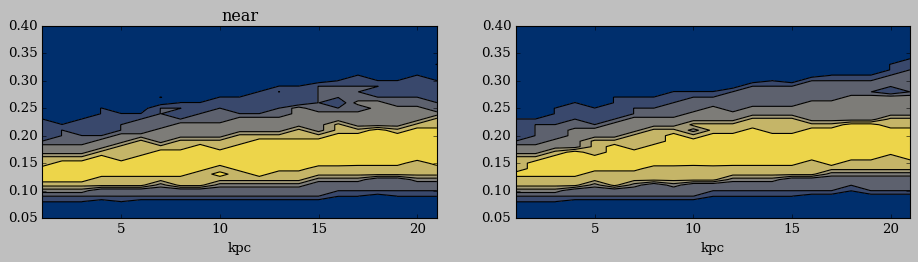

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nea_pd = pd.read_pickle('./data/sh_res_nea.pkl')
far_pd = pd.read_pickle('./data/sh_res_far.pkl')
cont_num = 7

nea_ary = nea_pd.values
far_ary = far_pd.values

fig = plt.figure(figsize=(14,3))
axl = fig.add_subplot(121)
axr = fig.add_subplot(122)
x = np.arange(1,21.1,1)
y = np.arange(0.05, 0.41, 0.01)
X,Y = np.meshgrid(x,y)

contl = axl.contourf(X, Y, nea_ary, cont_num, alpha=1, cmap='cividis')
contr = axr.contourf(X, Y, far_ary, cont_num, alpha=1, cmap='cividis')

Cl = axl.contour(X, Y, nea_ary, cont_num, colors='black')
axl.set_xlabel('kpc')
axl.set_title('near')
Cr = axr.contour(X, Y, far_ary, cont_num, colors='black')
axr.set_xlabel('kpc')
plt.show()

#### Fig5

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


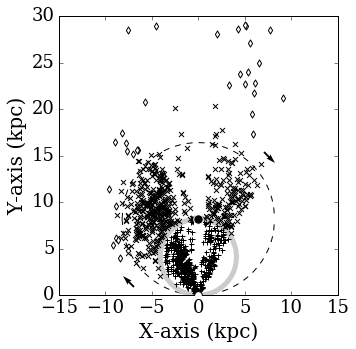

In [69]:
near_xplane = nea[i_nea] * np.cos(lat[i_kinedis][i_nea]*(np.pi/180)) * np.sin(lon[i_kinedis][i_nea]*(np.pi/180))
near_yplane = nea[i_nea] * np.cos(lat[i_kinedis][i_nea]*(np.pi/180)) * np.cos(lon[i_kinedis][i_nea]*(np.pi/180))
far_xplane  = far[i_far] * np.cos(lat[i_kinedis][i_far]*(np.pi/180)) * np.sin(lon[i_kinedis][i_far]*(np.pi/180)) 
far_yplane  = far[i_far] * np.cos(lat[i_kinedis][i_far]*(np.pi/180)) * np.cos(lon[i_kinedis][i_far]*(np.pi/180)) 
i_nearnan   = []
i_nearnan_  = []

for i,j in enumerate(i_far):
    if j in i_nea:
        i_nearnan_.append(i)
    else:
        i_nearnan.append(i)

rcParams['font.family'] = 'serif'
#fig = plt.figure(figsize=(10,10)) # when saving the figure
fig = plt.figure(figsize=(5,5))
fontsize = 20
ax = fig.add_subplot(111)
plt.scatter(-near_xplane,near_yplane,marker='+',color='black',s=25)
plt.scatter(-far_xplane[i_nearnan_],far_yplane[i_nearnan_], marker='x',color='black',s=25)
plt.scatter(-far_xplane[i_nearnan], far_yplane[i_nearnan] , color='white',marker='d',s=25,edgecolor='black')
plt.scatter(0,0,marker='o',color='white',s=60,edgecolor='black',zorder=10)
plt.scatter(0,8.2,marker='o',color='black',s=90,edgecolor='white',zorder=11)
# 太陽円, この円よりそとがわある天体はfar距離しかないはず
x = np.arange(-8.2,8.3,0.1)
y = np.sqrt((8.2**2)-(x)**2)+8.2
y_= -np.sqrt((8.2**2)-(x)**2)+8.2
plt.plot(x,y,color='black',linestyle='--',linewidth=1,zorder=0)
plt.plot(x,y_,color='black',linestyle='--',linewidth=1,zorder=0)

x2 = np.arange(-4.1,4.2,0.05)
y2 = np.sqrt((4.1**2)-(x2)**2)+4.1
y2_= -np.sqrt((4.1**2)-(x2)**2)+4.1
plt.plot(x2,y2,color='0.8',linewidth=5,linestyle='-',zorder=0)
plt.plot(x2,y2_,color='0.8',linewidth=5,linestyle='-',zorder=0)

plt.xlabel('X-axis (kpc)',fontsize=fontsize)
plt.ylabel('Y-axis (kpc)',fontsize=fontsize)
plt.axes().set_aspect('equal', 'datalim')
plt.tick_params(labelsize=18)
plt.quiver(-8.2*np.cos(np.pi/8),-8.2*np.sin(np.pi/8)+8.2-3.5,-10,10,width=0.0067,pivot='mid')
plt.quiver(8.2*np.cos(np.pi/8),+8.2*np.sin(np.pi/8)+8.2+3.5,10,-10,width=0.0067,pivot='mid')
plt.xlim([-15,15])
plt.ylim([0,30])

#plt.savefig('../../../../ohir_paper/Fig6.eps',dip=300,transparent=True,bbox_inches="tight")
plt.show()

#### Fig5

obvious outliner [] [0.51075054 0.51608564 0.53482561]
         near  far 
right   0.047 0.159
left    -0.029 -0.144
offset  0.009 0.007

** scale height[near]: 38.0  pc **
** scale height[far ]: 152.0 pc **
       Estimate  Std. Error      lwCI      upCI
mu     0.009366    0.001439  0.006545  0.012187
sigma  0.026123    0.001175  0.023819  0.028426
       Estimate  Std. Error      lwCI      upCI
mu     0.007490    0.004494 -0.001318  0.016299
sigma  0.107021    0.003669  0.099829  0.114213


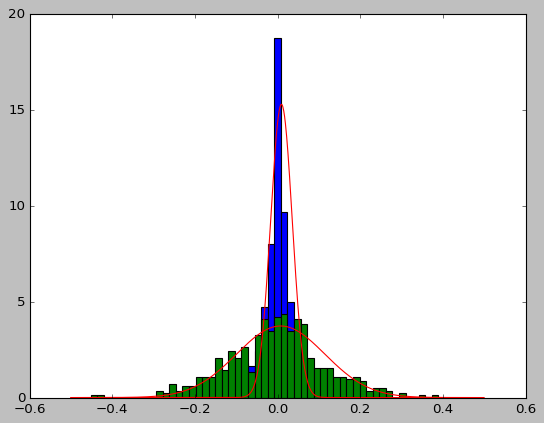

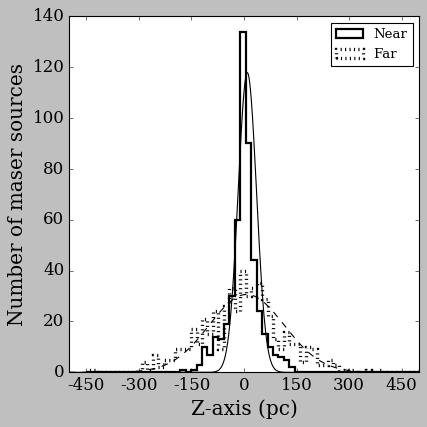

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm


zn     = nea[i_nea] * np.sin(np.radians(la[i_nea])) # Z-axis (near) [kpc]
zf     = far[i_far] * np.sin(np.radians(la[i_far])) # Z-axis (far)


bins = 63
xrange = [-0.5,0.5]

# gaussian function
def gaussian_func(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
# removing outliner
zf_ = zf[np.where(zf<0.5)]
zf_ = zf_[np.where(zf_>-0.5)]

zn = zn
histn_ = plt.hist(zn,bins=bins,range=xrange,density=True)
histf_ = plt.hist(zf_,bins=bins,range=xrange,density=True)
# generate toy data
x = histn_[1]
y = np.hstack([np.array([0]),histn_[0]])
x_ = histf_[1]
y_ = np.hstack([np.array([0]),histf_[0]])

# estimate optimal parameter & parameter covariance
poptn, pcovn = curve_fit(gaussian_func, x, y)
poptf, pcovf = curve_fit(gaussian_func, x_,y_)

# plot result
xd = np.arange(x.min(), x.max(), 0.001)
xd_  = np.arange(x_.min(),x_.max(),0.001)
estimated_curven = gaussian_func(xd, poptn[0],poptn[1])
estimated_curvef = gaussian_func(xd_, poptf[0], poptf[1])
plt.plot(xd, estimated_curven, color="r")
plt.plot(xd_, estimated_curvef,color='r')
#plt.legend()
#plt.savefig("gaussian_fitting.png")

 
# estimate standard Error
StdEn = np.sqrt(np.diag(pcovn))
StdEf = np.sqrt(np.diag(pcovf))
 
# estimate 95% confidence interval
alpha=0.025
lwCIn = poptn + norm.ppf(q=alpha)*StdEn
upCIn = poptn + norm.ppf(q=1-alpha)*StdEn
lwCIf = poptf + norm.ppf(q=alpha)*StdEf
upCIf = poptf + norm.ppf(q=1-alpha)*StdEf

# print result
matn = np.vstack((poptn,StdEn, lwCIn, upCIn)).T
matf = np.vstack((poptf,StdEf, lwCIf, upCIf)).T
dfn=pd.DataFrame(matn,index=("mu", "sigma"),
                columns=("Estimate", "Std. Error", "lwCI","upCI"))
dff=pd.DataFrame(matf,index=("mu", "sigma"),
                columns=("Estimate", "Std. Error", "lwCI","upCI"))



shrn_ =   np.sqrt((poptn[0]**2)+(2*(poptn[1]**2)))+ poptn[0]  #right (near)
shln_ = - np.sqrt((poptn[0]**2)+(2*(poptn[1]**2)))+ poptn[0]  #left  (near)
shrf_ =   np.sqrt((poptf[0]**2)+(2*(poptf[1]**2)))+ poptf[0]  #right (far )
shlf_ = - np.sqrt((poptf[0]**2)+(2*(poptf[1]**2)))+ poptf[0]  #left  (far )

print('obvious outliner',zf[zf<-0.5],zf[zf>0.5])
print('         near  far ')
print('right  ',round(shrn_,3), round(shrf_,3))
print('left   ',round(shln_,3), round(shlf_,3))
print('offset ',round(poptn[0],3),round(poptf[0],3))
print('')
print('** scale height[near]:',round(((shrn_ - shln_)/2)*1000),' pc **')
print('** scale height[far ]:', round(((shrf_-shlf_)/2)*1000),'pc **')
print(dfn)
print(dff)

rcParams['font.family'] = 'serif'
fontsize  = 18
labelsize = 15
linewidth = 2
bins      = 63
xlim      = [-0.5,0.5]
ylim      = [0,140]
density   = False

xticks    = [ -0.45,-0.3,-0.15,0,0.15,0.3,0.45]
xticklabels = ['-450','-300','-150','0','150','300','450']
fig = plt.figure(figsize=(5.5,5.5))
axl = fig.add_subplot(111,xticks=xticks,xticklabels=xticklabels)

#surface ara near: to not normalize !
histn  = axl.hist(zn, density=density,bins=bins,range=(zf.min(),zf.max()),
                  linestyle='-',histtype='step',color='black',label='Near',linewidth=linewidth)
widtn = histn[1][1]- histn[1][0] 
for i in range(len(histn[0])):
    if i == 0:
        surfacen = 0 # surface density
    surfacen += histn[0][i] * widtn


#surface ara near: to not normalize !
histf  = axl.hist(zf, density=density,bins=bins,range=(zf.min(),zf.max()),
                  linestyle=':',histtype='step',color='black',label='Far',linewidth=linewidth+1)
widtf = histf[1][1]- histf[1][0] 
for i in range(len(histf[0])):
    if i == 0:
        surfacef = 0 # surface density
    surfacef += histf[0][i] * widtf
axl.plot(xd_, surfacef * estimated_curvef, 'k-',linestyle='--')


axl.plot(xd, surfacen * estimated_curven, 'k-',linestyle='-')
axl.set_xlim(xlim)
axl.set_ylim(ylim)
axl.set_ylabel('Number of maser sources',fontsize=fontsize)
axl.set_xlabel('Z-axis (pc)',fontsize=fontsize)
#axl.set_title('Near kinematic distance',fontsize=fontsize)
axl.tick_params(labelsize=labelsize)
axl.legend(fontsize=12)
#axr.set_xlim(xlim)
#axr.set_ylim(ylim)
#axr.set_title('Far kinematic distance',fontsize=fontsize)
#axr.tick_params(labelsize=labelsize)
#axr.set_xlabel('Z-axis (pc)',fontsize=fontsize)
#axr.set_ylabel('Number of maser sources',fontsize=fontsize)

#axr.legend(fontsize=12)
plt.style.use('_classic_test')
plt.tight_layout()
#plt.savefig('../../../../ohir_paper/Fig5.eps',dpi=300,transparent=True)

plt.show()

## 3. Lifetime estimation
### 3.1 Cross Matching
### 3.1.1 SPLASH

number of OH/IR star detection in SPLASH:  533
number of OH/IR stars(sevenster) to be matched: 284
number of no counter part(OH/IR star) 32
number of OH/IR(new detection) in SPLASH:  281
number of no counter part(OH/IR star + agb) 23
number of no counter part(OH/IR star + agb + complement) 19


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


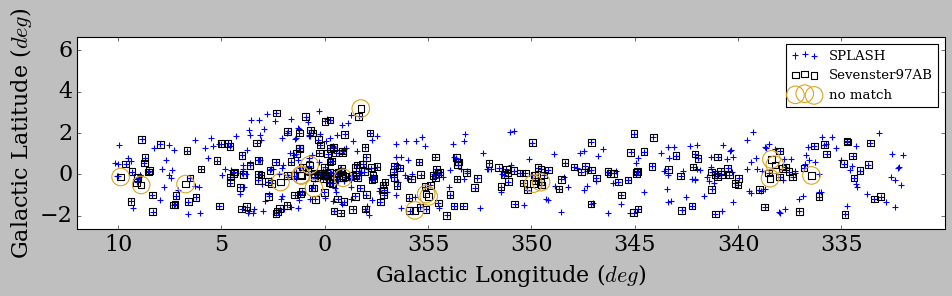

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['font.family'] = 'serif'
reso  = 0.005/2 # deg # look up the angular resolution of SPLASH(ATCA) and SEVENSTER
reso_parkes = 0.2/2 # deg Parkes


spla = np.load('./data/lifetime_spla.npy')

na  = np.array(spla[0]) 
ty  = np.array(spla[7])
l   = np.array([float(x)-360 if float(x)>180 else float(x) for x in spla[1]])
b   = np.array([float(x) for x in spla[2]]) 
nu  = np.array([float(x) for x in spla[3]]) 
vr  = np.array([ float(i) for i in spla[4]])
ex  = np.array([ float(i) for i in spla[5]])
f   = np.array([float(x) for x in spla[9]])
siz = np.array([ float(i) for i in spla[10]])

#   seve data format   np.vstack([ name, longitude, latitude, radial velocity, expansion velocity, 
#                               blue peak flux density, red peak flux density])
sev  = np.load('./data/sev_spla.npy')

na_sev = sev[0]
vr_sev = sev[3]
ex_sev = sev[4]
bf_sev = sev[5]
rf_sev = sev[6]
l_sev  = np.array([float(x[3:10])-360 if float(x[3:10])>180 else float(x[3:10]) for x in na_sev])
b_sev  = np.array([float(x[10:]) for x in na_sev])
f_sev  = np.array([max(float(bf_sev[i]),float(rf_sev[i])) for i in range(len(bf_sev))])


parkes         = [ 'G358.75+2.85',   'G007.30+1.20',   'G007.70+0.70', # Remain　< 0.22 Jy
                # candidate
                 'G334.60+0.20', 'G335.95+1.80', 'G338.70-0.70', 'G340.40+1.15', 'G341.15-0.40', 'G341.30+0.35', 'G342.50-1.10', 'G342.65+0.15', 'G343.10+1.30', 'G343.40-0.05', 'G343.75+1.05', # pilot
                 'G355.30+1.80',   'G356.30-1.65',   'G356.55-1.00', 'G358.65+1.60', 'G356.55+0.85','G356.65+0.10', # Galactic Centre
                 'G350.10+0.75', 'G350.35-1.50','G351.05+2.05','G353.65+0.80','G353.75-1.55','G353.95-1.00','G354.30-0.15'] # Remain

l_parkes = np.array([float(i[1:7])-360 if float(i[1:7])>180 else float(i[1:7]) for i in parkes])
b_parkes = np.array([float(i[7:]) for i in parkes])




# SFR, PN, SFR, SFR +  variability (11 sources)
remove_sev = [' OH340.042-00.092',' OH341.259+00.458',' OH346.505-00.052','*OH351.607+00.022',' OH352.135-01.369',' OH005.481+01.066',
' OH003.253-01.468', ' OH351.774-00.536','*OH000.892+01.342',' OH000.667-00.035' ,'*OH005.885-00.392' ]




i_spla = []
for i in range(len(na)):
    if -2 < b[i] < 3.2:
        i_spla.append(i)

i_sev = []
for i in range(len(na_sev)):
    if -28 <l_sev[i]< 10:
        if -2 <b_sev[i] <2:
            if not  na_sev[i] in remove_sev:
                i_sev.append(i)
    if -2 < l_sev[i] <4:
        if 2 < b_sev[i] < 3.2:
            if not na_sev[i] in remove_sev:
                i_sev.append(i)
            
# index of OH/IR star in atca
i_ohir     = []
i_agb      = []
for i in range(len(i_spla)):
    if ty[i_spla][i][:2] == 'ES':
        if nu[i_spla][i] > 1:
            i_ohir.append(i)
        else:
            i_agb.append(i)

i_match     = []
i_nomatch   = []
matched_ohir  = 0
matched_agb   = 0
matched_parkes  = 0
f_diff    = []
f_ratio    = []
f_sp  = []
f_se  = []
ex_sp = []
ex_se = []
vr_sp = []
vr_se = []
na_sp = []
na_se = []
nu_sp= []
siz_sp = []

no_match_count=0
for i in range(len(l_sev[i_sev])):
    r = np.sqrt( (l[i_spla][i_ohir] - l_sev[i_sev][i])**2 + ( b[i_spla][i_ohir] - b_sev[i_sev][i])**2 )
    rmin = r.min() #  minimum velue it the most closest source, it should be < 0.001 degree
    index = np.where(r == rmin)[0]
    if rmin <= reso:
        i_match.append(i)
        matched_ohir +=1
        diff = f_sev[i_sev][i] - f[i_spla][i_ohir][index]
        f_diff.append(diff)
        f_ratio.append(f[i_spla][i_ohir][index]/f_sev[i_sev][i])
        f_sp.append(f[i_spla][i_ohir][index])
        f_se.append(f_sev[i_sev][i])
        ex_sp.append(ex[i_spla][i_ohir][index])
        ex_se.append(ex_sev[i_sev][i])
        vr_sp.append(vr[i_spla][i_ohir][index])
        vr_se.append(vr_sev[i_sev][i])
        na_sp.append(na[i_spla][i_ohir][index])
        na_se.append(na_sev[i_sev][i])
        nu_sp.append(nu[i_spla][i_ohir][index])
        siz_sp.append(siz[i_spla][i_ohir][index])
    else:
        r = np.sqrt( (l[i_spla][i_agb] - l_sev[i_sev][i])**2 + ( b[i_spla][i_agb] - b_sev[i_sev][i])**2 )
        rmin = r.min() #  minimum velue it the most closest source, it should be < 0.001 degree
        index = np.where(r == rmin)[0]
        if rmin <= reso:
            i_match.append(i)
            matched_agb +=1
            diff = f_sev[i_sev][i] - f[i_spla][i_agb][index]
            f_diff.append(diff)
            f_ratio.append(f[i_spla][i_agb][index]/f_sev[i_sev][i])
            f_sp.append(f[i_spla][i_agb][index])
            f_se.append(f_sev[i_sev][i])
            ex_sp.append(ex[i_spla][i_agb][index])
            ex_se.append(ex_sev[i_sev][i])   
            vr_sp.append(vr[i_spla][i_agb][index])
            vr_se.append(vr_sev[i_sev][i]) 
            na_sp.append(na[i_spla][i_agb][index])
            na_se.append(na_sev[i_sev][i])
            nu_sp.append(nu[i_spla][i_agb][index])
            siz_sp.append(siz[i_spla][i_agb][index])
        else:
            r = np.sqrt( (l_parkes - l_sev[i_sev][i])**2 + ( b_parkes - b_sev[i_sev][i])**2 )
            rmin = r.min() #  minimum velue it the most closest source, it should be < 0.001 degree
            index = np.where( r == rmin)
            if rmin <= reso_parkes:
                i_match.append(i)
                matched_parkes +=1
                #print(l_parkes[index],b_parkes[index],na_sev[i_sev][i])
            else:
                i_nomatch.append(i)
                no_match_count+=1
                #print(no_match_count,na_sev[i_sev][i])

print('number of OH/IR star detection in SPLASH: ', len(i_ohir))
print('number of OH/IR stars(sevenster) to be matched:', len(i_sev))
print('number of no counter part(OH/IR star)',len(i_sev) - matched_ohir)
print('number of OH/IR(new detection) in SPLASH: ', len(i_ohir) - matched_ohir)
print('number of no counter part(OH/IR star + agb)',len(l_sev[i_sev]) - (matched_agb+matched_ohir))
print('number of no counter part(OH/IR star + agb + complement)',len(l_sev[i_sev]) - (matched_agb+matched_ohir+matched_parkes))

f_diff = np.array(f_diff)
f_ratio = np.array(f_ratio)
f_sp = np.array(f_sp).reshape(len(f_sp))
f_se = np.array(f_se)
ex_sp  = np.array(ex_sp)
ex_se  = np.array(ex_se)
vr_sp  = np.array(vr_sp)
vr_se  = np.array(vr_se)
na_sp  = np.array(na_sp).reshape(len(na_sp))
na_se  = np.array(na_se)
num_sp = np.array(nu_sp).reshape(len(nu_sp))
siz_sp = np.array(siz_sp)


fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(111)
ohir_atca_plot = ax.scatter(-l[i_spla][i_ohir], b[i_spla][i_ohir], marker='+', s=30, linewidth=1, label='SPLASH')
agb_atca_plot  = ax.scatter(-l[i_spla][i_agb], b[i_spla][i_agb], marker='+', s=30, linewidth=1)
ohir_supplement_plot = ax.scatter(-l_parkes,b_parkes,marker='+',s=30, linewidth=1)
sevenster_plot = ax.scatter(-l_sev[i_sev],b_sev[i_sev],marker='s',facecolor='None',s=35,linewidth=1,label='Sevenster97AB')
sevenster_not_plot = ax.scatter(-l_sev[i_sev][i_nomatch],b_sev[i_sev][i_nomatch], marker='o',s=250,facecolor='',label='no match', color='goldenrod')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(fontsize=12)
plt.xlim(-12,30)
plt.ylim(-3,7)
plt.xticks([-10,-5,0,5,10,15,20,25],['10','5', '0','355','350', '345', '340','335'])
plt.style.use('classic')
plt.tick_params(labelsize=20)
fig.align_xlabels()
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('Galactic Longitude ($deg$)', fontsize=20)
plt.ylabel('Galactic Latitude ($deg$)', fontsize=20)
#plt.savefig('../../Fig9.eps',dpi= 300, bbox_inches="tight", pad_inches=0.1)
plt.show()



### 3.1.2 THOR

number of OH/IR star detection in THOR:  374
number of OH/IR stars(sevenster) to be matched: 161
number of no counter part(OH/IR star) 25
number of OH/IR(new detection) in THOR:  238
number of no counter part(OH/IR star + agb) 11
rectified detection limit [Jy] 0.004


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


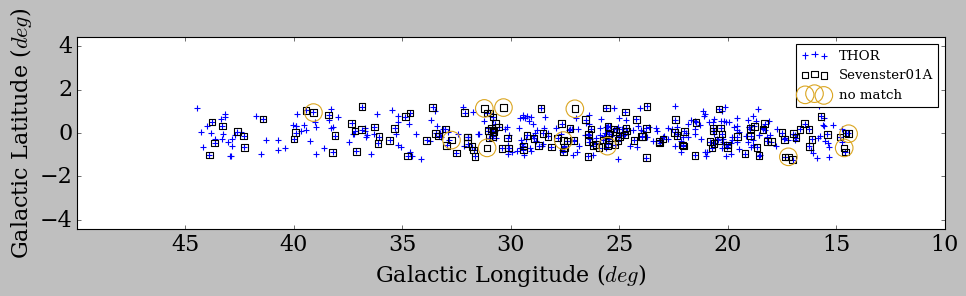

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['font.family'] = 'serif'
reso_thor  = 0.005/2 # deg # 19" = 0.0052 deg

#    thor data format       np.vstack([name, longitude, latitude ,maser_num, radial_velocity, expansion_velocity, 
#                           uncertainity_velocity, types, peak_fluxdens_max, apparent_size])
thor = np.load('./data/lifetime_thor.npy')

na_  = np.array(thor[0])
ty_  = np.array(thor[7])
l_   = np.array([float(x)-360 if float(x)>180 else float(x) for x in thor[1]])
b_   = np.array([float(x) for x in thor[2]]) 
nu_  = np.array([float(x) for x in thor[3]]) 
vr_  = np.array([float(x) for x in thor[4]])
ex_  = np.array([float(x) for x in thor[5]])
f_   = np.array([float(x) for x in thor[8]])
siz_ = np.array([float(i) for i in thor[9]])

#   sev data format   np.vstack([ name, longitude, latitude, radial velocity, expansion velocity, 
#                               blue peak flux density, red peak flux density])
sev_  = np.load('./data/sev_thor.npy')

na_sev_ = sev_[0]
vr_sev_ = sev_[3]
ex_sev_ = sev_[4]
bf_sev_ = sev_[5]
rf_sev_ = sev_[6]
l_sev_  = np.array([float(x[3:9])-360 if float(x[3:9])>180 else float(x[3:9]) for x in na_sev_])
b_sev_  = np.array([float(x[9:]) for x in na_sev_])
f_sev_  = np.array([max(float(bf_sev_[i]),float(rf_sev_[i])) for i in range(len(bf_sev_))])


# SFR, PN, SFR, SFR +  variability (8 sources)
remove_sev_= ['OH014.622+00.684','OH016.398-00.774','OH017.551-00.126', # SF, U, Star, 
              'OH023.480-00.866','OH024.581+00.224','OH029.446-00.677', # U, U, SF, 
              'OH030.270+00.632','OH030.944+00.035',] # U, SF

#remove_sev_ =[]

i_thor = []
for i in range(len(na_)):
    if l_.min() < l_[i] < l_sev_.max():
        i_thor.append(i)

i_sev_ = []
for i in range(len(na_sev_)):
    if -l_.min() <l_sev_[i]< l_sev_.max():
        if b_.min() < b_sev_[i] < b_.max():
            if not na_sev_[i] in remove_sev_:
                if ex_sev_[i] != '0.0':
                    i_sev_.append(i)
            
# index of OH/IR star in THOR
i_ohir_     = []
i_agb_      = []
i_else      = []
for i in range(len(i_thor)):
    if ty_[i_thor][i][:2] == 'ES':
        if nu_[i_thor][i] > 1:
            i_ohir_.append(i)
        else:
            i_agb_.append(i)
    else:
        i_else.append(i)

i_match_      = []
i_nomatch_    = []
matched_ohir_ = 0
matched_agb_  = 0
matched_else  = 0
f_diff_  = []
f_ratio_ = []
f_th     = []
f_se_    = []
ex_th    = []
ex_se_   = []
vr_th    = []
vr_se_   = []
na_th    = []
na_se_   = []
nu_th    = []
siz_th   = []

for i in range(len(l_sev_[i_sev_])):
    r = np.sqrt((l_[i_thor][i_ohir_] - l_sev_[i_sev_][i])**2 + ( b_[i_thor][i_ohir_] - b_sev_[i_sev_][i])**2)
    rmin = r.min() #  minimum velue it the most closest source, it should be < 0.001 degree
    index = np.where(r == rmin)[0]
    if rmin <= reso_thor:
        i_match_.append(i)
        matched_ohir_ +=1
        diff = f_sev[i_sev_][i] - f[i_thor][i_ohir_][index]
        f_diff_.append(diff)
        f_ratio_.append(f_[i_thor][i_ohir_][index]/f_sev_[i_sev_][i])
        f_th.append(f_[i_thor][i_ohir_][index])
        f_se_.append(f_sev_[i_sev_][i])
        ex_th.append(ex_[i_thor][i_ohir_][index])
        ex_se_.append(ex_sev_[i_sev_][i])
        vr_th.append(vr_[i_thor][i_ohir_][index])
        vr_se_.append(vr_sev_[i_sev_][i])
        na_th.append(na_[i_thor][i_ohir_][index])
        na_se_.append(na_sev_[i_sev_][i])
        nu_th.append(nu_[i_thor][i_ohir_][index])
        siz_th.append(siz_[i_thor][i_ohir_][index])
    else:
        r = np.sqrt( (l_[i_thor][i_agb_] - l_sev_[i_sev_][i])**2 + ( b_[i_thor][i_agb_] - b_sev_[i_sev_][i])**2 )
        rmin = r.min() #  minimum velue it the most closest source, it should be < 0.001 degree
        index = np.where(r == rmin)[0]
        if rmin <= reso_thor:
            i_match_.append(i)
            #('    '+na_sev_[i_sev_][i]+' (A)&')
            matched_agb_ +=1
            diff = f_sev_[i_sev_][i] - f_[i_thor][i_agb_][index]
            f_diff_.append(diff)
            f_ratio_.append(f_[i_thor][i_agb_][index]/f_sev_[i_sev_][i])
            f_th.append(f_[i_thor][i_agb_][index])
            f_se_.append(f_sev_[i_sev_][i])
            ex_th.append(ex_[i_thor][i_agb_][index])
            ex_se_.append(ex_sev_[i_sev_][i])   
            vr_th.append(vr_[i_thor][i_agb_][index])
            vr_se_.append(vr_sev_[i_sev_][i]) 
            na_th.append(na_[i_thor][i_agb_][index])
            na_se_.append(na_sev_[i_sev_][i])
            nu_th.append(nu_[i_thor][i_agb_][index])
            siz_th.append(siz_[i_thor][i_agb_][index])
        else:
            r = np.sqrt( (l_[i_thor][i_else] - l_sev_[i_sev_][i])**2 + ( b_[i_thor][i_else] - b_sev_[i_sev_][i])**2 )
            rmin = r.min() #  minimum velue it the most closest source, it should be < 0.001 degree
            index = np.where(r == rmin)[0]
            if rmin <= reso_thor:
                #print(na_sev_[i_sev_][i],na_[i_thor][i_else][index],ty_[i_thor][i_else][index])
                matched_else +=1
            else:
                i_nomatch_.append(i)
                #print(na_sev_[i_sev_][i],'&',f_sev_[i_sev_][i],'&',ex_sev_[i_sev_][i],'&','U\\\\')

print('number of OH/IR star detection in THOR: ', len(i_ohir_))
print('number of OH/IR stars(sevenster) to be matched:', len(i_sev_))
print('number of no counter part(OH/IR star)',len(i_sev_) - matched_ohir_)
print('number of OH/IR(new detection) in THOR: ', len(i_ohir_) - matched_ohir_)
print('number of no counter part(OH/IR star + agb)',len(i_sev_) - (matched_agb_+matched_ohir_+matched_else))
#print('number of no counter part(OH/IR star + agb + else)',len(i_sev_) - (matched_agb_+matched_ohir_+matched_else))


f_diff_ = np.array(f_diff_)
f_ratio_ = np.array(f_ratio_)
f_th   = np.array(f_th).reshape(len(f_th))
f_se_  = np.array(f_se_)
ex_th  = np.array([ float(x) for x in np.array(ex_th)])
ex_se_ = np.array([float(x) for x in np.array(ex_se_)])
vr_th  = np.array(vr_th).reshape(len(f_th))
vr_se_ = np.array([float(x) for x in np.array(vr_se_)])
na_th  = np.array(na_th).reshape(len(f_th))
na_se_ = np.array(na_se_)
num_th = np.array(nu_th).reshape(len(f_th))
siz_th = np.array(siz_th)


variability = 3
systematic_err = 1.3354169120205324
#detection_limit = 0.065 * 3
detection_limit = 0.001 * 2 # f_.min() = 0.022
limit_flux = (detection_limit*variability)/systematic_err # SPLASH detection limit [jy]
print('rectified detection limit [Jy]',round(limit_flux,3))



fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(111)
ohir_atca_plot = ax.scatter(-l_[i_thor][i_ohir_], b_[i_thor][i_ohir_], marker='+', s=30, linewidth=1, label='THOR')
agb_atca_plot  = ax.scatter(-l_[i_thor][i_agb_], b_[i_thor][i_agb_], marker='+', s=30, linewidth=1)
sevenster_plot = ax.scatter(-l_sev_[i_sev_],b_sev_[i_sev_],marker='s',facecolor='None',s=35,linewidth=1,label='Sevenster01A')
sevenster_not_plot = ax.scatter(-l_sev_[i_sev_][i_nomatch_],b_sev_[i_sev_][i_nomatch_], marker='o',s=250,facecolor='',label='no match', color='goldenrod')


plt.axes().set_aspect('equal', 'datalim')
plt.legend(fontsize=12)
#plt.xlim(-,30)

plt.xticks([-45,-40,-35,-30,-25,-20,-15,-10],['45','40','35','30','25','20','15','10'])
plt.style.use('classic')
plt.tick_params(labelsize=20)
fig.align_xlabels()
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('Galactic Longitude ($deg$)', fontsize=20)
plt.ylabel('Galactic Latitude ($deg$)', fontsize=20)
#plt.savefig('../../Fig9.eps',dpi= 300, bbox_inches="tight", pad_inches=0.1)
plt.show()

### 3.2 Lifetime Probability Distribution


the most probable lifetime is: [296.67]  years
total source (n): 445 dissapeared (m): 30


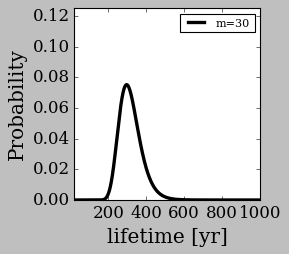

In [89]:
# probability P
import matplotlib.patches as patches
from pylab import rcParams
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
rcParams['font.family'] = 'serif'
dT = 20 # SEV01-THOR: 1993FEB-1995June to 2013-2015
limit_year = 1000
n = 284+161  # number of all data splash(295 - 11) + thor(107) 
m = 19+11  # number of masers dissappeared in dT splash (19) + thor(11)
n_m = n - m
lifetime = np.arange(dT,limit_year,0.01) # year

F29 = comb(n,m)
probability29 =  F29*(((dT/lifetime)**m)*((1-(dT/lifetime))**n_m))

print('the most probable lifetime is:', lifetime[np.where(probability29 == probability29.max())],' years')
print('total source (n):',n,'dissapeared (m):',m)

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.plot(lifetime, probability29, linewidth=3, label='m='+str(m),color='black')

ax.set_xlabel('lifetime [yr]',fontsize=18)
ax.set_ylabel('Probability',fontsize=18)

plt.ylim(0, 0.001)
plt.legend(fontsize=10)
plt.tick_params(labelsize=15)
plt.style.use('_classic_test')
plt.ylim(0,probability29.max()+ 0.05)
plt.xlim(dT,limit_year)

plt.show()

#### Reproduction of Fig.5. from Engels and Jimenez-Esteban (2007) (for check)

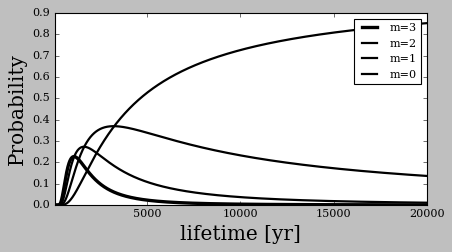

In [94]:
# probability P
import matplotlib.patches as patches
from pylab import rcParams
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
rcParams['font.family'] = 'serif'
# 75 maser sources were dissappeared ! 


dT = 28
limit_year = 20000
n = 114
m = 3  # number of masers dissappeared in dT
n_m = n - m
lifetime = np.arange(dT,limit_year,0.01) # year

F3 = comb(n,m)
probability3 =  F3*(((dT/lifetime)**m)*((1-(dT/lifetime))**n_m))

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.plot(lifetime, probability3, linewidth=3, label='m='+str(m),color='black')

m = 2  # number of masers dissappeared in dT
n_m = n - m
lifetime = np.arange(dT,limit_year,0.01) # year

F2 = comb(n,m)
probability2 =  F2*(((dT/lifetime)**m)*((1-(dT/lifetime))**n_m))
ax.plot(lifetime, probability2, linewidth=2, label='m='+str(m),color='black')


m = 1  # number of masers dissappeared in dT
n_m = n - m
lifetime = np.arange(dT,limit_year,0.01) # year

F1 = comb(n,m)
probability1 =  F1*(((dT/lifetime)**m)*((1-(dT/lifetime))**n_m))

ax.plot(lifetime, probability1, linewidth=2, label='m='+str(m),color='black')

m = 0  # number of masers dissappeared in dT
n_m = n - m
lifetime = np.arange(dT,limit_year,0.01) # year

F0 = comb(n,m)
probability0 =  F0*(((dT/lifetime)**m)*((1-(dT/lifetime))**n_m))

Q = 1 - (probability3+probability2+probability1+probability0)

ax.plot(lifetime, probability0, linewidth=2, label='m='+str(m),color='black')

ax.set_xlabel('lifetime [yr]',fontsize=18)
ax.set_ylabel('Probability',fontsize=18)

#plt.ylim(0, 0.001)
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
plt.style.use('_classic_test')
#plt.ylim(0,probability29.max()+ 0.05)
plt.xlim(dT,limit_year)
plt.show()

#### Probability finding at least m maser sources dissapeared in dT
$$
Q_m^n = \sum_{i=m}^n \frac{n!}{m!(n-m)!}\big(\frac{\delta T}{T}\big)^m \big(1 - \frac{\delta T}{T}\big)^{n-m}
$$

the upper limit of lifetime (1 sigma=0.3318) is: 375.0  years
the upper limit of lifetime (2 sigma=0.046) is: 504.0  years
the upper limit of lifetime (3 sigma=0.003) is: 672.0  years


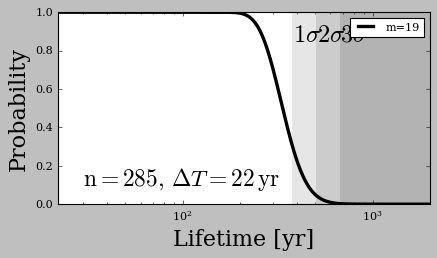

In [97]:
# probability P
import matplotlib.patches as patches
from pylab import rcParams
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
rcParams['font.family'] = 'serif'
# 75 maser sources were dissappeared ! 


dT = 22
limit_year = 2000
lifetime = np.arange(dT,limit_year,0.1) # year
n = 285  # number of all data 295 - 9
m_ = 19   # number of masers dissappeared in dT


for m in range(m_):
    if m == 0:
        n_m = n - m
        probability =  comb(n,m) *(((dT/lifetime)**m)*((1-(dT/lifetime))**n_m))
    else:
        n_m = n - m
        probability +=  comb(n,m) *(((dT/lifetime)**m)*((1-(dT/lifetime))**n_m))
        
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
Q = 1 - probability

sigma3 = np.where(Q>0.003)[0][-1]
sigma2 = np.where(Q>0.046)[0][-1]
sigma1 = np.where(Q>0.318)[0][-1]
#ax.plot([lifetime[sigma1],lifetime[sigma1]] ,[1,0], linewidth=1,color='black')
#ax.plot([lifetime[sigma2],lifetime[sigma2]],[1,0], linewidth=1,color='black')
#ax.plot([lifetime[sigma3],lifetime[sigma3]],[1,0], linewidth=1,color='black')

linewidth = 0
r_sigma1 = patches.Rectangle(xy=(lifetime[sigma1], 0), width=lifetime[sigma2] - lifetime[sigma1], height=1,fill=True, fc = '0.9',linewidth=linewidth)
r_sigma2 = patches.Rectangle(xy=(lifetime[sigma3], 0), width=lifetime[sigma2] - lifetime[sigma3], height=1,fill=True, fc='0.8',linewidth=linewidth)
r_sigma3 = patches.Rectangle(xy=( lifetime[sigma3],0),width=lifetime[-1] - lifetime[sigma3], height=1,fill=True,fc='0.7',linewidth=linewidth)
r_sigma0 = patches.Rectangle(xy=(dT,0), width = lifetime[sigma1] - dT, height=1, fill=True, fc='1',linewidth=0)

ax.set_xlabel('Log (lifetime [yr])',fontsize=18)
ax.set_ylabel('Probability',fontsize=18)
ax.add_patch(r_sigma0)
ax.add_patch(r_sigma3)
ax.add_patch(r_sigma2)
ax.add_patch(r_sigma1)



ax.plot(lifetime, Q, linewidth=3, label='m='+str(m_),color='black')

ax.set_xlabel('Lifetime [yr]',fontsize=20)
ax.set_ylabel('Probability',fontsize=20)


plt.text(lifetime[sigma1]+5, 0.85, r'$1\sigma$',fontsize=22,color='black') # 1 sigma
plt.text(lifetime[sigma2]+5, 0.85, r'$2\sigma}$',fontsize=22,color='black') # 2 sigma
plt.text(lifetime[sigma3]+5, 0.85, r'$3\sigma$',fontsize=22,color='black') # 3 sigma
plt.text(30, 0.1, r'${\rm n}='+str(n)+r', \, {\it \Delta  T}='+str(dT)+r' \,{\rm yr}$',fontsize=21,color='black')



print('the upper limit of lifetime (1 sigma=0.3318) is:', round(lifetime[sigma1]),' years')
print('the upper limit of lifetime (2 sigma=0.046) is:', round(lifetime[sigma2]),' years')
print('the upper limit of lifetime (3 sigma=0.003) is:', round(lifetime[sigma3]),' years')


#plt.ylim(0, 0.001)
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
plt.style.use('_classic_test')
#plt.ylim(0,probability29.max()+ 0.05)
plt.xscale('log')
#plt.savefig('../../Fig10.eps',dpi=300, transparent='true',bbox_inches='tight')
plt.xlim(dT,limit_year)
plt.show()


### 3.3 Figures
#### Fig.9

SPLASH: y=x+ 0.19 +- 0.01
THOR:   y=x+ 0.13 +- 0.02
SPLASH brighter factor of 1.56 +- 1.03
THOR brighter factor of 1.34 +- 1.05


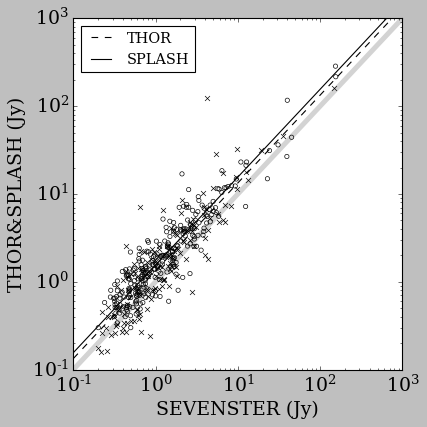

In [83]:
### def linear_fit(x, a, b):
def linear_fit(x, a, b):
    return a*x + b

def multi_fit(x,b):
    return x + b

flux_sevens_log_sp   = np.log10(f_se)
flux_lifetime_log_sp = np.log10(f_sp)
flux_sevens_log_th   = np.log10(f_se_)
flux_lifetime_log_th = np.log10(f_th)


x = np.arange(0.1,1000,0.1)
x_log = np.log10(x)
param_sp, cov_sp = curve_fit(multi_fit, flux_sevens_log_sp, flux_lifetime_log_sp)
param_th, cov_th = curve_fit(multi_fit, flux_sevens_log_th, flux_lifetime_log_th)
fit_sp = 10 ** (x_log + param_sp[0])
fit_th = 10 ** (x_log + param_th[0])
fit_sp_log2_up = 10 ** (x_log + param_sp[0] + np.log(2))
fit_sp_log2_down = 10 ** (x_log + param_sp[0] - np.log(2))
rcParams['font.family'] = 'serif'
size = 17
plt.figure(figsize=(5.5,5.5))
plt.scatter(f_se,f_sp,zorder=4,color='',edgecolor='black',marker='.',s=60,linewidth=0.6)
plt.scatter(f_se_,f_th,zorder=4,color='black',edgecolor='',marker='x',s=20,linewidth=0.6)
plt.plot(x,fit_th, label='THOR', color='black',linestyle='--',linewidth=1,zorder=3)
plt.plot(x,fit_sp, label='SPLASH', color='black',linestyle='-',linewidth=1,zorder=3)
#plt.plot(x,fit_sp_log2_up, color='lightgrey',linestyle='-',linewidth=1,zorder=3)
#plt.plot(x,fit_sp_log2_down, color='lightgrey',linestyle='-',linewidth=1,zorder=3)




plt.xlabel('SEVENSTER (Jy)',fontsize=size)
plt.ylabel('THOR&SPLASH (Jy)',fontsize=size)
plt.xlim([0.1,1000])
plt.ylim([0.1,1000])
plt.plot([0.1,1000],[0.1,1000],color='lightgray',linestyle='-',linewidth=4.5,zorder=1)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labelsize=size)
print('SPLASH: y=x+',round(param_sp[0],2),'+-', round(np.sqrt(np.diag(cov_sp))[0],2))
print('THOR:   y=x+',round(param_th[0],2),'+-', round(np.sqrt(np.diag(cov_th))[0],2))


print('SPLASH brighter factor of',round(10**param_sp[0],2),'+-',round(10**np.sqrt(np.diag(cov_sp))[0],2))
print('THOR brighter factor of',round(10**param_th[0],2),'+-',round(10**np.sqrt(np.diag(cov_th))[0],2))


plt.tick_params(labelsize=size)
plt.legend(loc='upper left',fontsize=13)
plt.tight_layout()

#plt.savefig('../../../../ohir_paper/Fig10.eps',transparent=True,dpi=300,bbox_inches='tight')
plt.show()

#### Fig. 10

       Estimate  Std. Error      lwCI      upCI
mu     0.021929    0.005169  0.011799  0.032060
sigma  0.196341    0.004220  0.188070  0.204613
total number of ratio estimation (ohir+agb): 411
number of sources in 1/3 to 3: 398
10**0.5 : 3.1622776601683795
10**-0.5: 0.31622776601683794


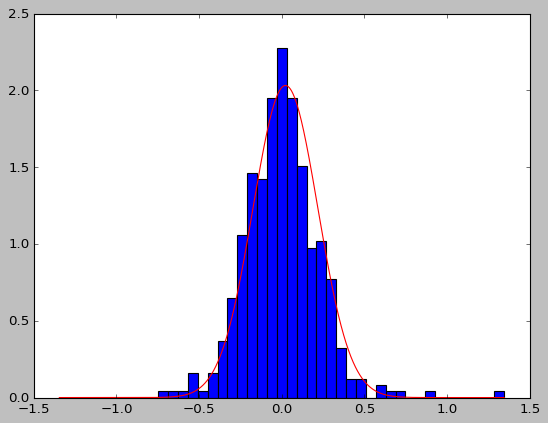

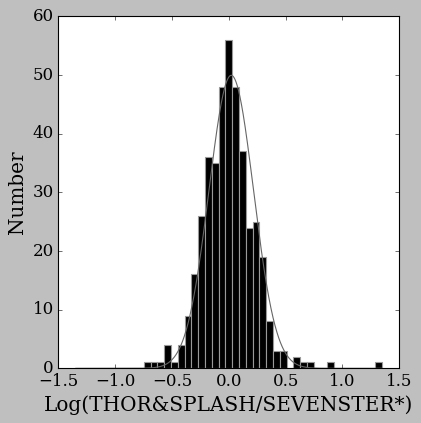

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
 
ratio = np.hstack([f_sp,f_th])/np.hstack([f_se*1.56,f_se_*1.34])
xrange = (np.log10(1/ratio.max()),np.log10(ratio.max()))
bins = 45

# gaussian function
def gaussian_func(x,mu,sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
# removing outliner
hist = plt.hist(np.log10(ratio),bins=bins,range=xrange,density=True)
# generate toy data
x = hist[1]
y = np.hstack([np.array([0]),hist[0]])
# estimate optimal parameter & parameter covariance
popt, pcov = curve_fit(gaussian_func, x, y)

# plot result
xd = np.arange(x.min(), x.max(), 0.001)
estimated = gaussian_func(xd, popt[0],popt[1])
plt.plot(xd, estimated, color="r")
 
# estimate standard Error
StdE = np.sqrt(np.diag(pcov))
 
# estimate 95% confidence interval
alpha=0.025
lwCI = popt + norm.ppf(q=alpha)*StdE
upCI = popt + norm.ppf(q=1-alpha)*StdE

# print result
mat = np.vstack((popt,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("mu", "sigma"),
                columns=("Estimate", "Std. Error", "lwCI","upCI"))
print(df)
print('total number of ratio estimation (ohir+agb):',len(ratio))
print('number of sources in 1/3 to 3:', len(ratio) - (len(ratio[ratio<10**(-0.5)])+len(ratio[ratio>+10**0.5])))


labelsize=15
rcParams['font.family'] = 'serif'
bins=45
fontsize=18
xlim = (np.log10(1/7),np.log10(7))
plt.figure(figsize=(5.5,5.5))
hist2 = plt.hist(np.log10(ratio),bins=bins,color='black',range=xrange, alpha=1,edgecolor='0.6')
width   = hist2[1][1] - hist2[1][0]
surface = np.sum([hist2[0][i]*width for i in range(len(hist2[0]))])
plt.plot(xd, estimated*surface, color="0.4")
plt.xlabel('Log(THOR&SPLASH/SEVENSTER*)',fontsize=fontsize)
plt.ylabel('Number',fontsize=fontsize)
plt.style.use('classic')
plt.ylim(0,60)
#plt.xlim(xlim)
4
#plt.legend(fontsize=17)
plt.tick_params(labelsize=labelsize)
#plt.savefig('../../../../ohir_paper/Fig11.eps',transparent=True,dpi=300,bbox_inches='tight')
print('10**0.5 :',10**0.5)
print('10**-0.5:',10**-0.5)
plt.show()